<a href="https://colab.research.google.com/github/Tahseenasatti/BRFSS-Data-Preprocessing/blob/main/Heart_Disease_prediction_(BRFSS_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
!pip install scikit-learn

# ***Data Downloading ***

In [ ]:
brfss_data = pd.read_csv('/content/heart_2022_no_nans.csv')

In [ ]:
brfss_data

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
0                     Yes         9.0            None of them             No   
1                     Yes         6.0            None of them             No   
2                      No         8.0  6 or more, but not all             No   
3                     Yes         9.0            None of them             No   
4                     Yes         5.0                  1 to 5             No   
...                   ...         ...                     ...            ...   
246017                Yes         6.0            None of them             No   
246018                Yes         7.0            None of them             No   
246019                Yes         7.0                  1 to 5             No   
246020                Yes         7.0            None of them             No   
246021                 No         5.0            None of them            Yes   

        ... HeightInMeters WeightInKilograms    BMI AlcoholDrinkers  \
0       ...           1.60             71.67  27.99              No   
1       ...           1.78             95.25  30.13              No   
2       ...           1.85            108.86  31.66             Yes   
3       ...           1.70             90.72  31.32              No   
4       ...           1.55             79.38  33.07              No   
...     ...            ...               ...    ...             ...   
246017  ...           1.78            102.06  32.28             Yes   
246018  ...           1.93             90.72  24.34              No   
246019  ...           1.68             83.91  29.86             Yes   
246020  ...           1.70             83.01  28.66              No   
246021  ...           1.83            108.86  32.55              No   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
0              No          Yes           Yes   
1              No          Yes           Yes   
2              No           No           Yes   
3              No          Yes           Yes   
4              No          Yes           Yes   
...           ...          ...           ...   
246017         No           No            No   
246018         No           No            No   
24601

In [ ]:
brfss_data.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

In [ ]:
brfss_data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
RaceEthnicityCategory         object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
AlcoholDrinkers               object
HIVTesting                    object
FluVaxLast12                  object
PneumoVaxEver                 object
TetanusLast10Tdap             object
HighRiskLastYear              object
CovidPos                      object
dtype: object

In [ ]:
brfss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
brfss_data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos                     0
dtype: int64

In [ ]:
brfss_data.isnull().sum() * 100/len(brfss_data)

State                        0.0
Sex                          0.0
GeneralHealth                0.0
PhysicalHealthDays           0.0
MentalHealthDays             0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
SleepHours                   0.0
RemovedTeeth                 0.0
HadHeartAttack               0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
HeightInMeters               0.0
WeightInKilograms            0.0
BMI                          0.0
AlcoholDrinkers              0.0
HIVTesting                   0.0
FluVaxLast12                 0.0
PneumoVaxEver                0.0
TetanusLast10Tdap            0.0
HighRiskLastYear             0.0
CovidPos                     0.0
dtype: float64

In [ ]:
brfss_data.fillna(value=brfss_data.mode(), inplace=True)

In [ ]:
brfss_data.isnull()

State    Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0       False  False          False               False             False   
1       False  False          False               False             False   
2       False  False          False               False             False   
3       False  False          False               False             False   
4       False  False          False               False             False   
...       ...    ...            ...                 ...               ...   
246017  False  False          False               False             False   
246018  False  False          False               False             False   
246019  False  False          False               False             False   
246020  False  False          False               False             False   
246021  False  False          False               False             False   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                 False               False       False         False   
1                 False               False       False         False   
2                 False               False       False         False   
3                 False               False       False         False   
4                 False               False       False         False   
...                 ...                 ...         ...           ...   
246017            False               False       False         False   
246018            False               False       False         False   
246019            False               False       False         False   
246020            False               False       False         False   
246021            False               False       False         False   

        HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0                False  ...           False              False  False   
1                False  ...           False              False  False   
2                False  ...           False              False  False   
3                False  ...           False              False  False   
4                False  ...           False              False  False   
...                ...  ...             ...                ...    ...   
246017           False  ...           False              False  False   
246018           False  ...           False              False  False   
246019           False  ...           False              False  False   
246020           False  ...           False              False  False   
246021           False  ...           False              False  False   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                 False       False         False          False   
1                 False       False         False          False   
2                 False       False         False          False   
3                 False       False         False          False   
4                 False       False         False          False   
...                 ...         ...           ...            ...   
246017            False       False         False          False   
246018            False       False         False          False   
246019            False       False         False          False   
246020            False       False         False          False   
246021            False       False         False          False   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                   False             False     False  
1                   False             False     False  
2                   False             False     False  
3                   False             False     False  
4                   False             False     False  
...                   ...               ...       ...  
246017              False             False     False  
246018              False             False     False  
246019  

In [ ]:
brfss_data.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory                    13
HeightInMeters                101
WeightInKilograms             516
BMI                          3514
AlcoholDrinkers                 2
HIVTesting                      2
FluVaxLast12                    2
PneumoVaxEver                   2
TetanusLast10Tdap               4
HighRiskLastYear                2
CovidPos                        3
dtype: int64

<Axes: >

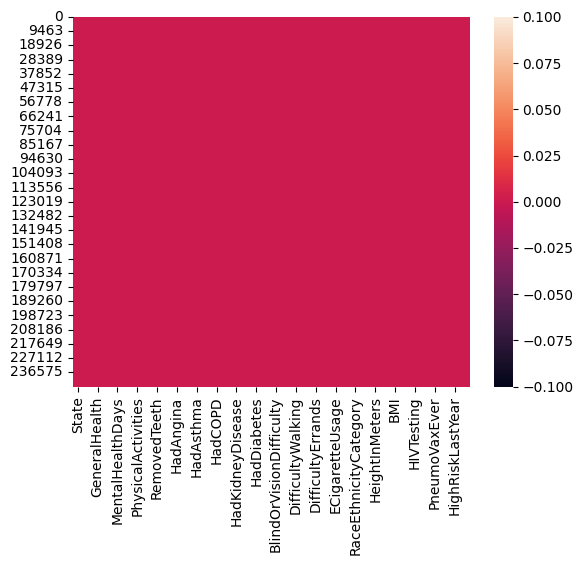

In [ ]:
sns.heatmap(brfss_data.isnull())

In [ ]:
brfss_data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

In [ ]:
brfss_data.isnull().sum() * 100/len(brfss_data)

State                        0.0
Sex                          0.0
GeneralHealth                0.0
PhysicalHealthDays           0.0
MentalHealthDays             0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
SleepHours                   0.0
RemovedTeeth                 0.0
HadHeartAttack               0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
HeightInMeters               0.0
WeightInKilograms            0.0
BMI                          0.0
AlcoholDrinkers              0.0
HIVTesting                   0.0
FluVaxLast12                 0.0
PneumoVaxEver                0.0
TetanusLast10Tdap            0.0
HighRiskLastYear             0.0
CovidPos                     0.0
dtype: float64

In [ ]:
# Fill missing values with mode for each column
brfss_data = brfss_data.apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
brfss_data.isnull().sum() * 100/len(brfss_data)

State                        0.0
Sex                          0.0
GeneralHealth                0.0
PhysicalHealthDays           0.0
MentalHealthDays             0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
SleepHours                   0.0
RemovedTeeth                 0.0
HadHeartAttack               0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
HeightInMeters               0.0
WeightInKilograms            0.0
BMI                          0.0
AlcoholDrinkers              0.0
HIVTesting                   0.0
FluVaxLast12                 0.0
PneumoVaxEver                0.0
TetanusLast10Tdap            0.0
HighRiskLastYear             0.0
CovidPos                     0.0
dtype: float64

<Axes: >

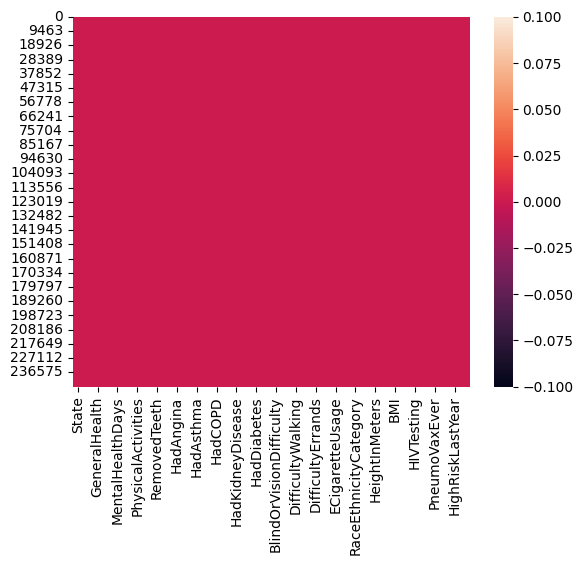

In [ ]:
sns.heatmap(brfss_data.isnull())

# ***Remove Duplicate Rows***

In [ ]:
# Check for duplicate rows
duplicates = brfss_data.duplicated()

# Count total number of duplicate rows
print(f"Total number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows (if any)
duplicate_rows = brfss_data[duplicates]
print(duplicate_rows)

Total number of duplicate rows: 9
               State     Sex GeneralHealth  PhysicalHealthDays  \
5702         Arizona  Female     Excellent                 0.0   
87555       Maryland  Female          Good                 0.0   
88402       Maryland    Male     Excellent                 0.0   
137645    New Jersey    Male          Good                 0.0   
174923  Rhode Island  Female     Very good                 0.0   
184137  South Dakota  Female          Fair                30.0   
208013       Vermont  Female     Very good                 0.0   
216362    Washington    Male     Excellent                 0.0   
225974    Washington    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
5702                 0.0  Within past year (anytime less than 12 months ...   
87555                0.0  Within past year (anytime less than 12 months ...   
88402                0.0  Within past year (anytime less than 12 mon

In [ ]:
# Remove duplicate rows
brfss_data_cleaned = brfss_data.drop_duplicates()

# Check the shape of the dataset after removing duplicates
print(f"Shape of dataset after removing duplicates: {brfss_data_cleaned.shape}")

Shape of dataset after removing duplicates: (246013, 40)


In [ ]:
brfss_data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

# ***Remove Outliers***

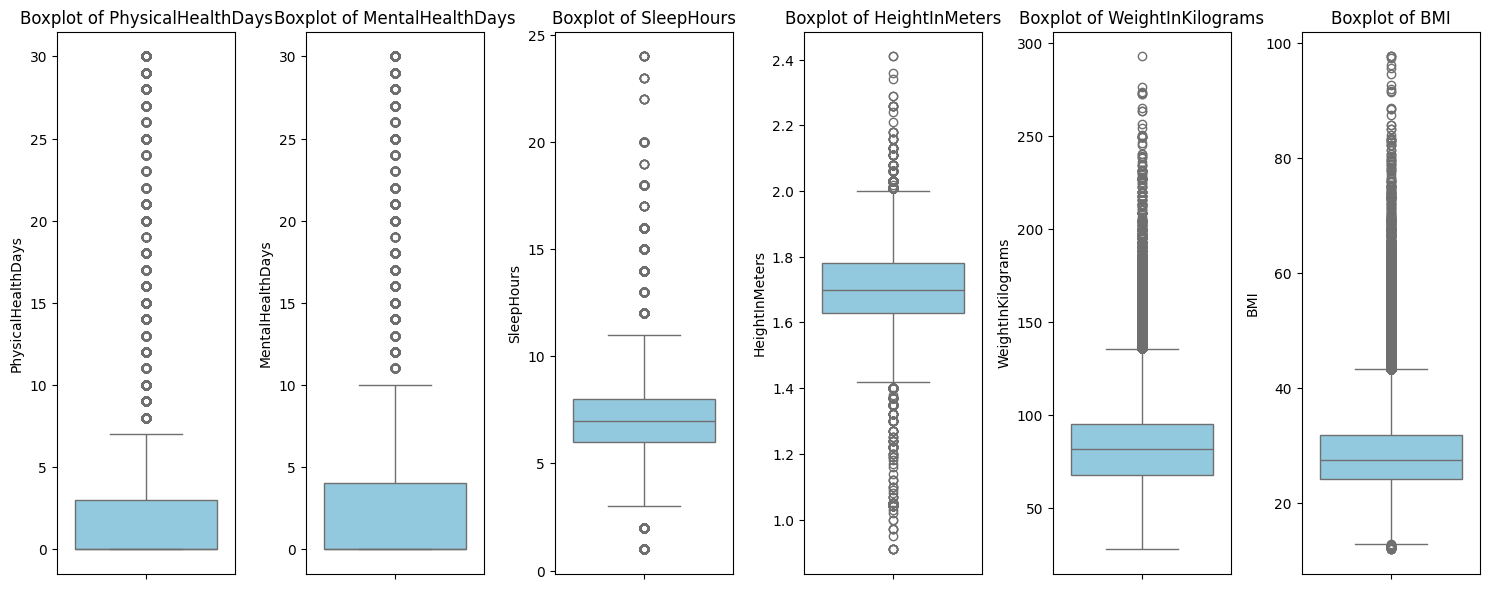

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to check
columns_to_check = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Set up the figure size and layout
plt.figure(figsize=(15, 6))  # Adjusted figure size for better visibility
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 6, i)  # Arrange plots in 1 row and 6 columns
    sns.boxplot(y=brfss_data_cleaned[column], color='skyblue')  # Choose a neutral color like sky blue
    plt.title(f'Boxplot of {column}')  # Title each subplot with the column name

plt.tight_layout()  # This ensures there is no overlap in the plots
plt.show()  # Display the plots




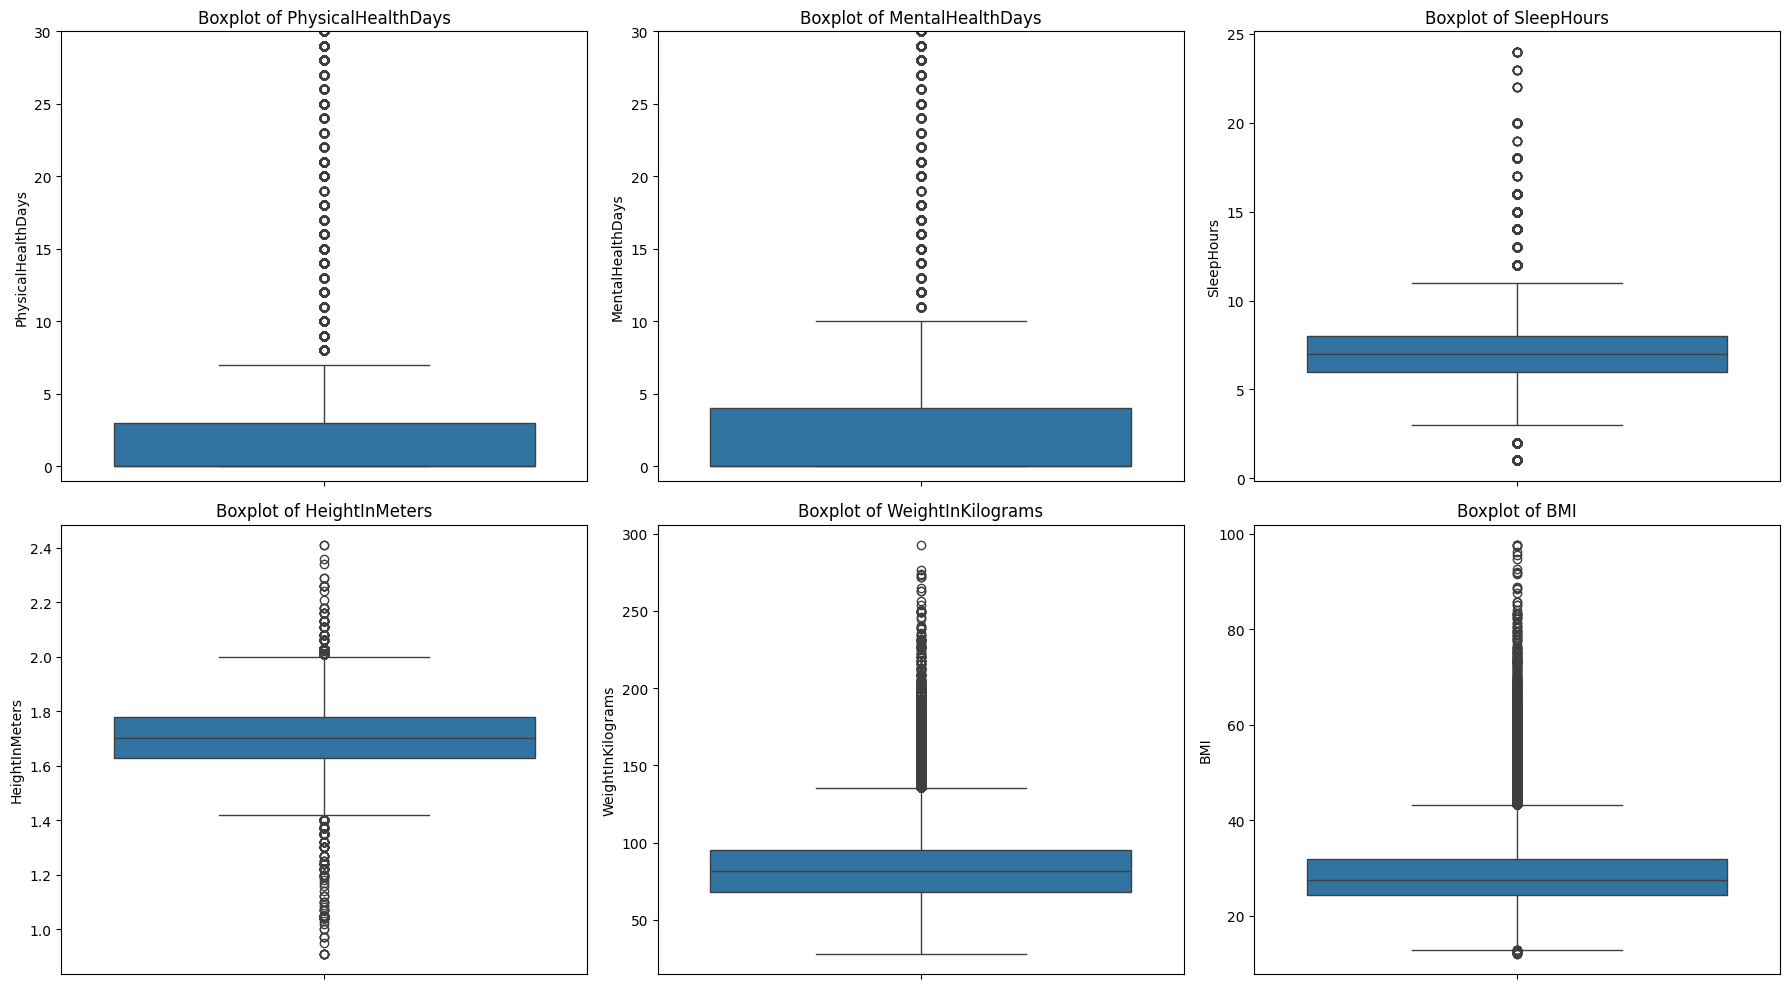

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



columns_to_check = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=brfss_data[column])
    plt.title(f'Boxplot of {column}')

    # Adjust y-axis limits based on the data range
    if column in ['PhysicalHealthDays', 'MentalHealthDays']:
        plt.ylim(-1, 30)  # Adjust the limits as needed based on your dataset's specifics

plt.tight_layout()
plt.show()


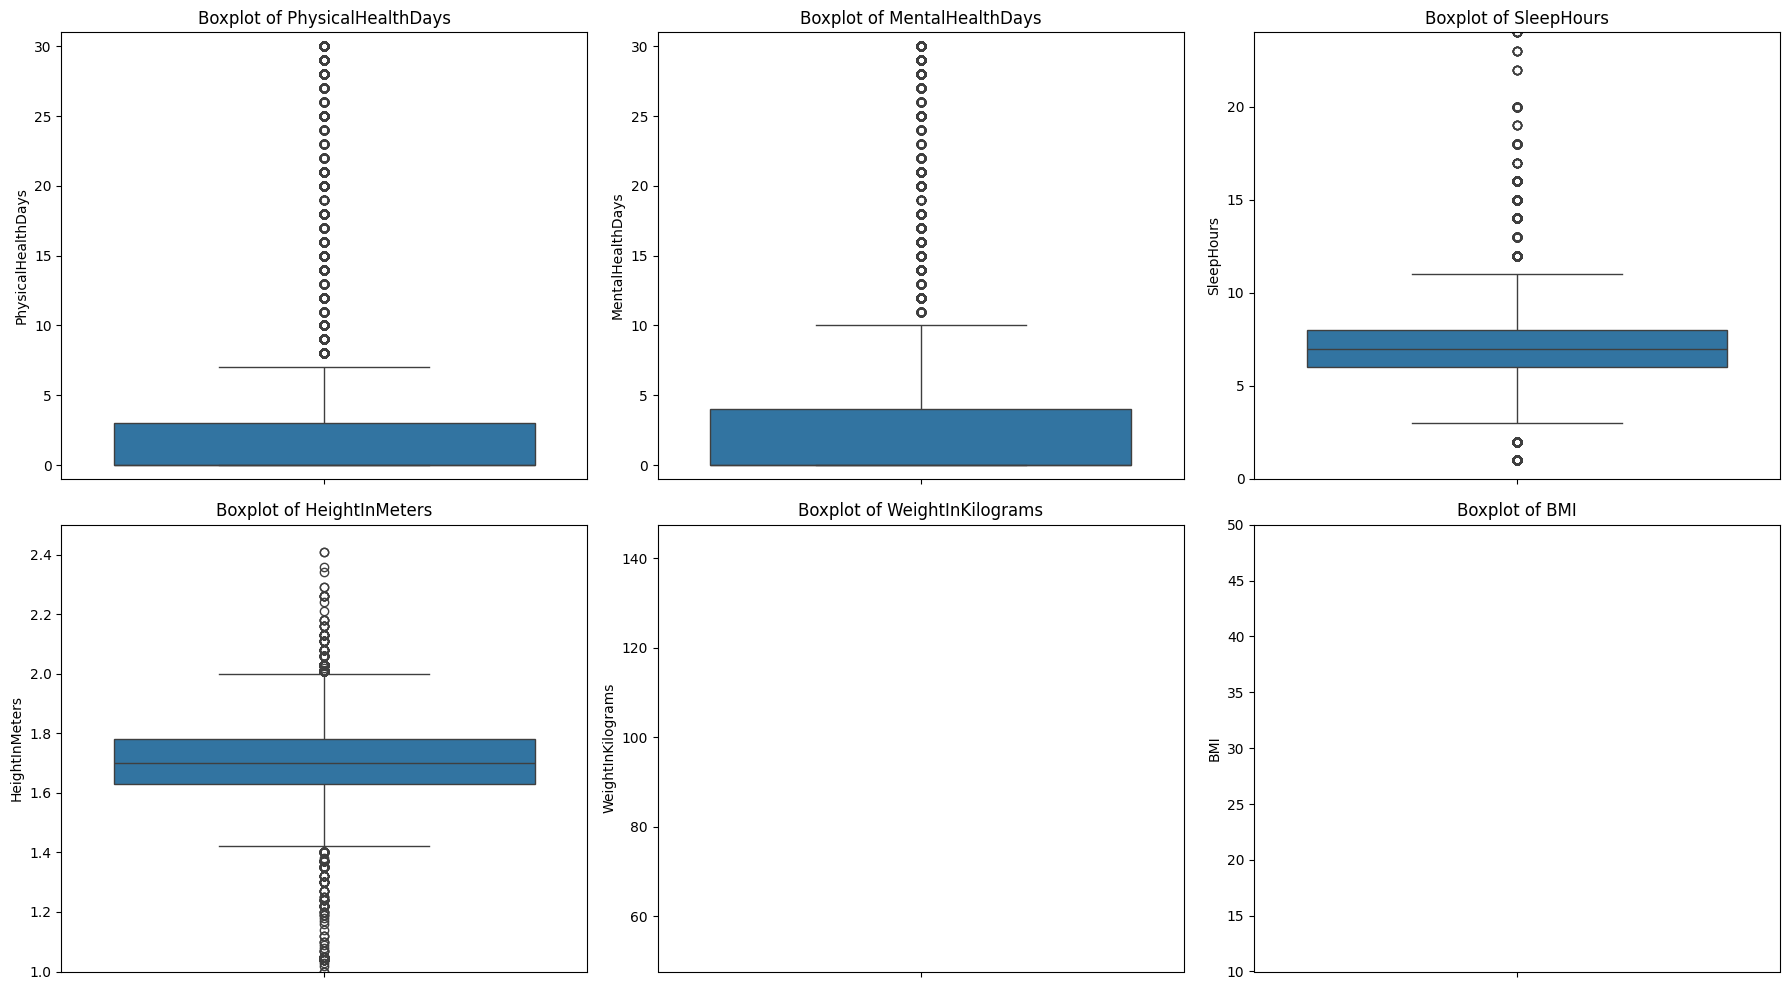

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


columns_to_check = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

plt.figure(figsize=(18, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)

    # Apply log transformation if data is highly skewed
    if column in ['WeightInKilograms', 'BMI']:
        data = np.log1p(brfss_data[column])  # log1p is used to handle zero values smoothly
        sns.boxplot(y=data)
    else:
        sns.boxplot(y=brfss_data[column])

    plt.title(f'Boxplot of {column}')
    # Custom y-limits for each subplot
    if column == 'PhysicalHealthDays':
        plt.ylim(-1, 31)
    elif column == 'MentalHealthDays':
        plt.ylim(-1, 31)
    elif column == 'SleepHours':
        plt.ylim(0, 24)
    elif column == 'HeightInMeters':
        plt.ylim(1, 2.5)
    elif column == 'WeightInKilograms':
        plt.ylim(brfss_data['WeightInKilograms'].quantile(0.01), brfss_data['WeightInKilograms'].quantile(0.99))
    elif column == 'BMI':
        plt.ylim(10, 50)

plt.tight_layout()
plt.show()


In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows where the value is within the bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# List of columns to check for outliers
columns_to_check = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Remove outliers for each column
brfss_data_cleaned = brfss_data.copy()  # Make a copy to avoid altering the original dataset
for column in columns_to_check:
    brfss_data_cleaned = remove_outliers_iqr(brfss_data_cleaned, column)

# Check the shape of the dataset after removing outliers
print(f"Shape of dataset after removing outliers: {brfss_data_cleaned.shape}")

Shape of dataset after removing outliers: (170640, 40)


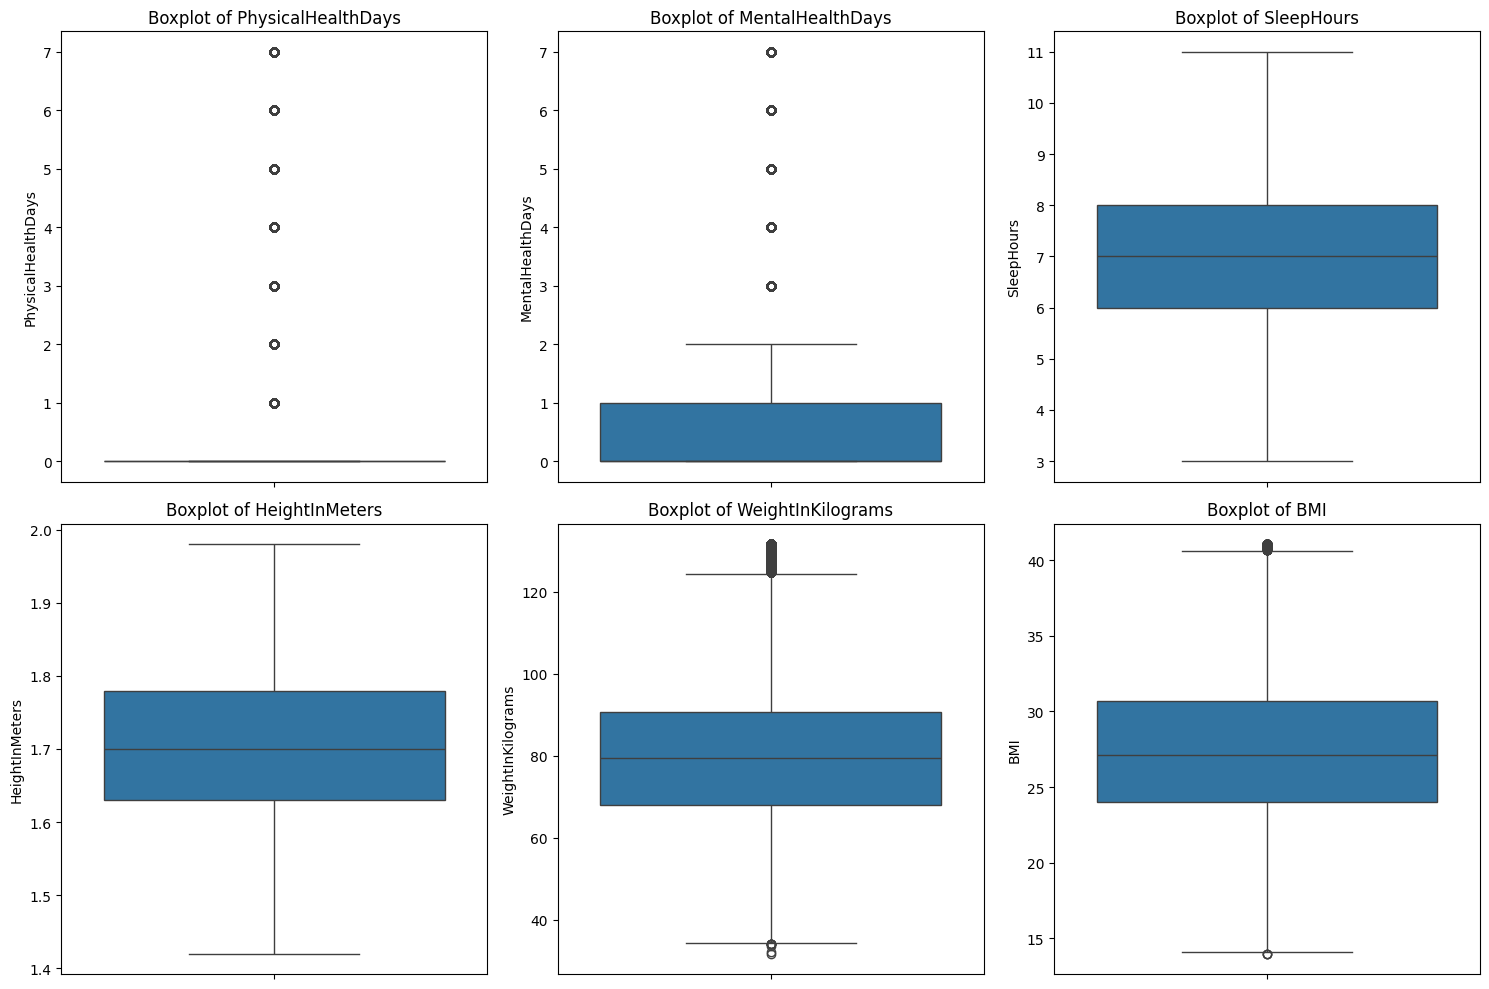

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each column to check for remaining outliers
columns_to_check = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=brfss_data_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [ ]:
# Function to check for remaining outliers using IQR
def check_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find rows with values outside the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Check for remaining outliers in each column
for column in columns_to_check:
    num_outliers = check_outliers_iqr(brfss_data_cleaned, column)
    print(f"Number of outliers remaining in {column}: {num_outliers}")

Number of outliers remaining in PhysicalHealthDays: 40305
Number of outliers remaining in MentalHealthDays: 24445
Number of outliers remaining in SleepHours: 0
Number of outliers remaining in HeightInMeters: 0
Number of outliers remaining in WeightInKilograms: 2080
Number of outliers remaining in BMI: 463


In [ ]:
# Define the function to view outliers based on IQR
def view_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Investigate outliers for 'MentalHealthDays' and 'PhysicalHealthDays'
for column in ['MentalHealthDays', 'PhysicalHealthDays']:
    outliers = view_outliers(brfss_data_cleaned, column)
    print(f"Sample outliers in {column}:")
    print(outliers.head())
    print()



Sample outliers in MentalHealthDays:
       State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
22   Alabama  Female     Very good                 0.0               5.0   
32   Alabama  Female          Poor                 4.0               4.0   
55   Alabama  Female          Fair                 0.0               3.0   
78   Alabama    Male     Very good                 5.0               5.0   
105  Alabama  Female          Good                 5.0               5.0   

                                       LastCheckupTime PhysicalActivities  \
22   Within past year (anytime less than 12 months ...                Yes   
32   Within past year (anytime less than 12 months ...                Yes   
55   Within past year (anytime less than 12 months ...                 No   
78   Within past year (anytime less than 12 months ...                Yes   
105  Within past year (anytime less than 12 months ...                Yes   

     SleepHours            RemovedTeeth Had

In [ ]:
# Remove outliers for 'PhysicalHealthDays'
brfss_data_cleaned = brfss_data_cleaned[~brfss_data_cleaned['PhysicalHealthDays'].isin(view_outliers(brfss_data_cleaned, 'PhysicalHealthDays')['PhysicalHealthDays'])]

# Remove outliers for 'MentalHealthDays'
brfss_data_cleaned = brfss_data_cleaned[~brfss_data_cleaned['MentalHealthDays'].isin(view_outliers(brfss_data_cleaned, 'MentalHealthDays')['MentalHealthDays'])]

# Check the shape of the dataset after removal
print(f"Shape of dataset after removing outliers: {brfss_data_cleaned.shape}")

Shape of dataset after removing outliers: (103835, 40)


In [ ]:
def calculate_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate bounds for both columns
lower_bound_physical, upper_bound_physical = calculate_bounds(brfss_data_cleaned, 'PhysicalHealthDays')
lower_bound_mental, upper_bound_mental = calculate_bounds(brfss_data_cleaned, 'MentalHealthDays')


In [ ]:
# Calculate median values
median_physical_health_days = brfss_data_cleaned['PhysicalHealthDays'].median()
median_mental_health_days = brfss_data_cleaned['MentalHealthDays'].median()

# Impute outliers with median value
brfss_data_cleaned.loc[brfss_data_cleaned['PhysicalHealthDays'] > upper_bound_physical, 'PhysicalHealthDays'] = median_physical_health_days
brfss_data_cleaned.loc[brfss_data_cleaned['MentalHealthDays'] > upper_bound_mental, 'MentalHealthDays'] = median_mental_health_days


In [ ]:
print("Number of outliers remaining in PhysicalHealthDays:", len(view_outliers(brfss_data_cleaned, 'PhysicalHealthDays')))
print("Number of outliers remaining in MentalHealthDays:", len(view_outliers(brfss_data_cleaned, 'MentalHealthDays')))


Number of outliers remaining in PhysicalHealthDays: 0
Number of outliers remaining in MentalHealthDays: 0


# ***Encoding Variables***

In [ ]:
import pandas as pd
from sklearn import preprocessing
# Binary encoding for 'HadHeartAttack'
brfss_data_cleaned['HadHeartAttack'] = brfss_data_cleaned['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Label encoding for categorical variables
label_encoder = preprocessing.LabelEncoder()

# Encoding categorical features
categorical_columns = ['PhysicalActivities', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'AlcoholDrinkers',
                       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
                       'HighRiskLastYear', 'CovidPos']

for column in categorical_columns:
    brfss_data_cleaned[column] = label_encoder.fit_transform(brfss_data_cleaned[column])

# Display the first few rows of the cleaned and encoded dataset
brfss_data_cleaned.head()



State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1   Alabama    1              4                 0.0               0.0   
2   Alabama    1              4                 0.0               0.0   
5   Alabama    1              2                 0.0               0.0   
9   Alabama    0              4                 0.0               0.0   
10  Alabama    1              4                 0.0               0.0   

    LastCheckupTime  PhysicalActivities  SleepHours            RemovedTeeth  \
1                 3                   1         6.0            None of them   
2                 3                   0         8.0  6 or more, but not all   
5                 3                   1         7.0            None of them   
9                 3                   1         7.0            None of them   
10                3                   1         8.0                  1 to 5   

    HadHeartAttack  ... HeightInMeters WeightInKilograms    BMI  \
1                0  ...           1.78             95.25  30.13   
2                0  ...           1.85            108.86  31.66   
5                0  ...           1.85            120.20  34.96   
9                0  ...           1.68             63.50  22.60   
10               0  ...           1.83            122.47  36.62   

   AlcoholDrinkers HIVTesting FluVaxLast12 PneumoVaxEver TetanusLast10Tdap  \
1                0          0            1             1                 2   
2                1          0            0             1                 0   
5                1          1            1             0                 2   
9                0          0            1             1                 0   
10               1          0            1             1                 1   

   HighRiskLastYear CovidPos  
1                 0        0  
2                 0        2  
5                 0        0  
9                 0        0  
10                0        0  

[5 rows x 40 columns]

In [ ]:
# Initialize the label encoder
label_encoder = preprocessing.LabelEncoder()

# Apply label encoding to the 'RemovedTeeth' column in the cleaned dataset
brfss_data_cleaned['RemovedTeeth'] = label_encoder.fit_transform(brfss_data_cleaned['RemovedTeeth'])

# View the transformed column in the cleaned dataset
print(brfss_data_cleaned['RemovedTeeth'].head())


1     3
2     1
5     3
9     3
10    0
Name: RemovedTeeth, dtype: int64


In [ ]:
brfss_data_cleaned.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1   Alabama    1              4                 0.0               0.0   
2   Alabama    1              4                 0.0               0.0   
5   Alabama    1              2                 0.0               0.0   
9   Alabama    0              4                 0.0               0.0   
10  Alabama    1              4                 0.0               0.0   

    LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
1                 3                   1         6.0             3   
2                 3                   0         8.0             1   
5                 3                   1         7.0             3   
9                 3                   1         7.0             3   
10                3                   1         8.0             0   

    HadHeartAttack  ... HeightInMeters WeightInKilograms    BMI  \
1                0  ...           1.78             95.25  30.13   
2                0  ...           1.85            108.86  31.66   
5                0  ...           1.85            120.20  34.96   
9                0  ...           1.68             63.50  22.60   
10               0  ...           1.83            122.47  36.62   

   AlcoholDrinkers HIVTesting FluVaxLast12 PneumoVaxEver TetanusLast10Tdap  \
1                0          0            1             1                 2   
2                1          0            0             1                 0   
5                1          1            1             0                 2   
9                0          0            1             1                 0   
10               1          0            1             1                 1   

   HighRiskLastYear CovidPos  
1                 0        0  
2                 0        2  
5                 0        0  
9                 0        0  
10                0        0  

[5 rows x 40 columns]

In [ ]:
print("Data types after encoding:")
print(brfss_data_cleaned.dtypes)

Data types after encoding:
State                         object
Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                   int64
HadHeartAttack                 int64
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteU

In [ ]:
# Check unique values for each object column
object_columns = brfss_data_cleaned.select_dtypes(include=['object']).columns

for col in object_columns:
    print(f"{col}: {brfss_data_cleaned[col].unique()}")


State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
HadAngina: ['No' 'Yes']
HadStroke: ['No' 'Yes']
HadAsthma: ['No' 'Yes']
HadSkinCancer: ['No' 'Yes']
HadCOPD: ['No' 'Yes']
HadDepressiveDisorder: ['No' 'Yes']
HadKidneyDisease: ['No' 'Yes']
HadArthritis: ['Yes' 'No']
HadDiabetes: ['Yes' 'No' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
DeafOrHardOfHearing: [

In [ ]:
# Apply one-hot encoding to nominal categorical columns
brfss_data_cleaned = pd.get_dummies(brfss_data_cleaned,
                                    columns=['State', 'RaceEthnicityCategory',
                                             'SmokerStatus', 'ECigaretteUsage', 'AgeCategory'])


In [ ]:
# Apply label encoding to binary yes/no columns
binary_columns = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
                  'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
                  'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                  'DifficultyConcentrating', 'DifficultyWalking',
                  'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan']

for col in binary_columns:
    brfss_data_cleaned[col] = brfss_data_cleaned[col].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
# Create separate binary columns for each unique value in HadDiabetes
brfss_data_cleaned['HadDiabetes_Yes'] = brfss_data_cleaned['HadDiabetes'].apply(lambda x: 1 if x == 'Yes' else 0)
brfss_data_cleaned['HadDiabetes_PreDiabetes'] = brfss_data_cleaned['HadDiabetes'].apply(lambda x: 1 if x == 'No, pre-diabetes or borderline diabetes' else 0)
brfss_data_cleaned['HadDiabetes_Pregnancy'] = brfss_data_cleaned['HadDiabetes'].apply(lambda x: 1 if x == 'Yes, but only during pregnancy (female)' else 0)

# Drop the original HadDiabetes column
brfss_data_cleaned.drop('HadDiabetes', axis=1, inplace=True)


In [ ]:
# Check the data types again to ensure everything is numerical
print(brfss_data_cleaned.dtypes)


Sex                              int64
GeneralHealth                    int64
PhysicalHealthDays             float64
MentalHealthDays               float64
LastCheckupTime                  int64
                                ...   
AgeCategory_Age 75 to 79          bool
AgeCategory_Age 80 or older       bool
HadDiabetes_Yes                  int64
HadDiabetes_PreDiabetes          int64
HadDiabetes_Pregnancy            int64
Length: 117, dtype: object


In [ ]:
print(brfss_data_cleaned.isnull().sum())


Sex                            0
GeneralHealth                  0
PhysicalHealthDays             0
MentalHealthDays               0
LastCheckupTime                0
                              ..
AgeCategory_Age 75 to 79       0
AgeCategory_Age 80 or older    0
HadDiabetes_Yes                0
HadDiabetes_PreDiabetes        0
HadDiabetes_Pregnancy          0
Length: 117, dtype: int64


# ***Visualization***

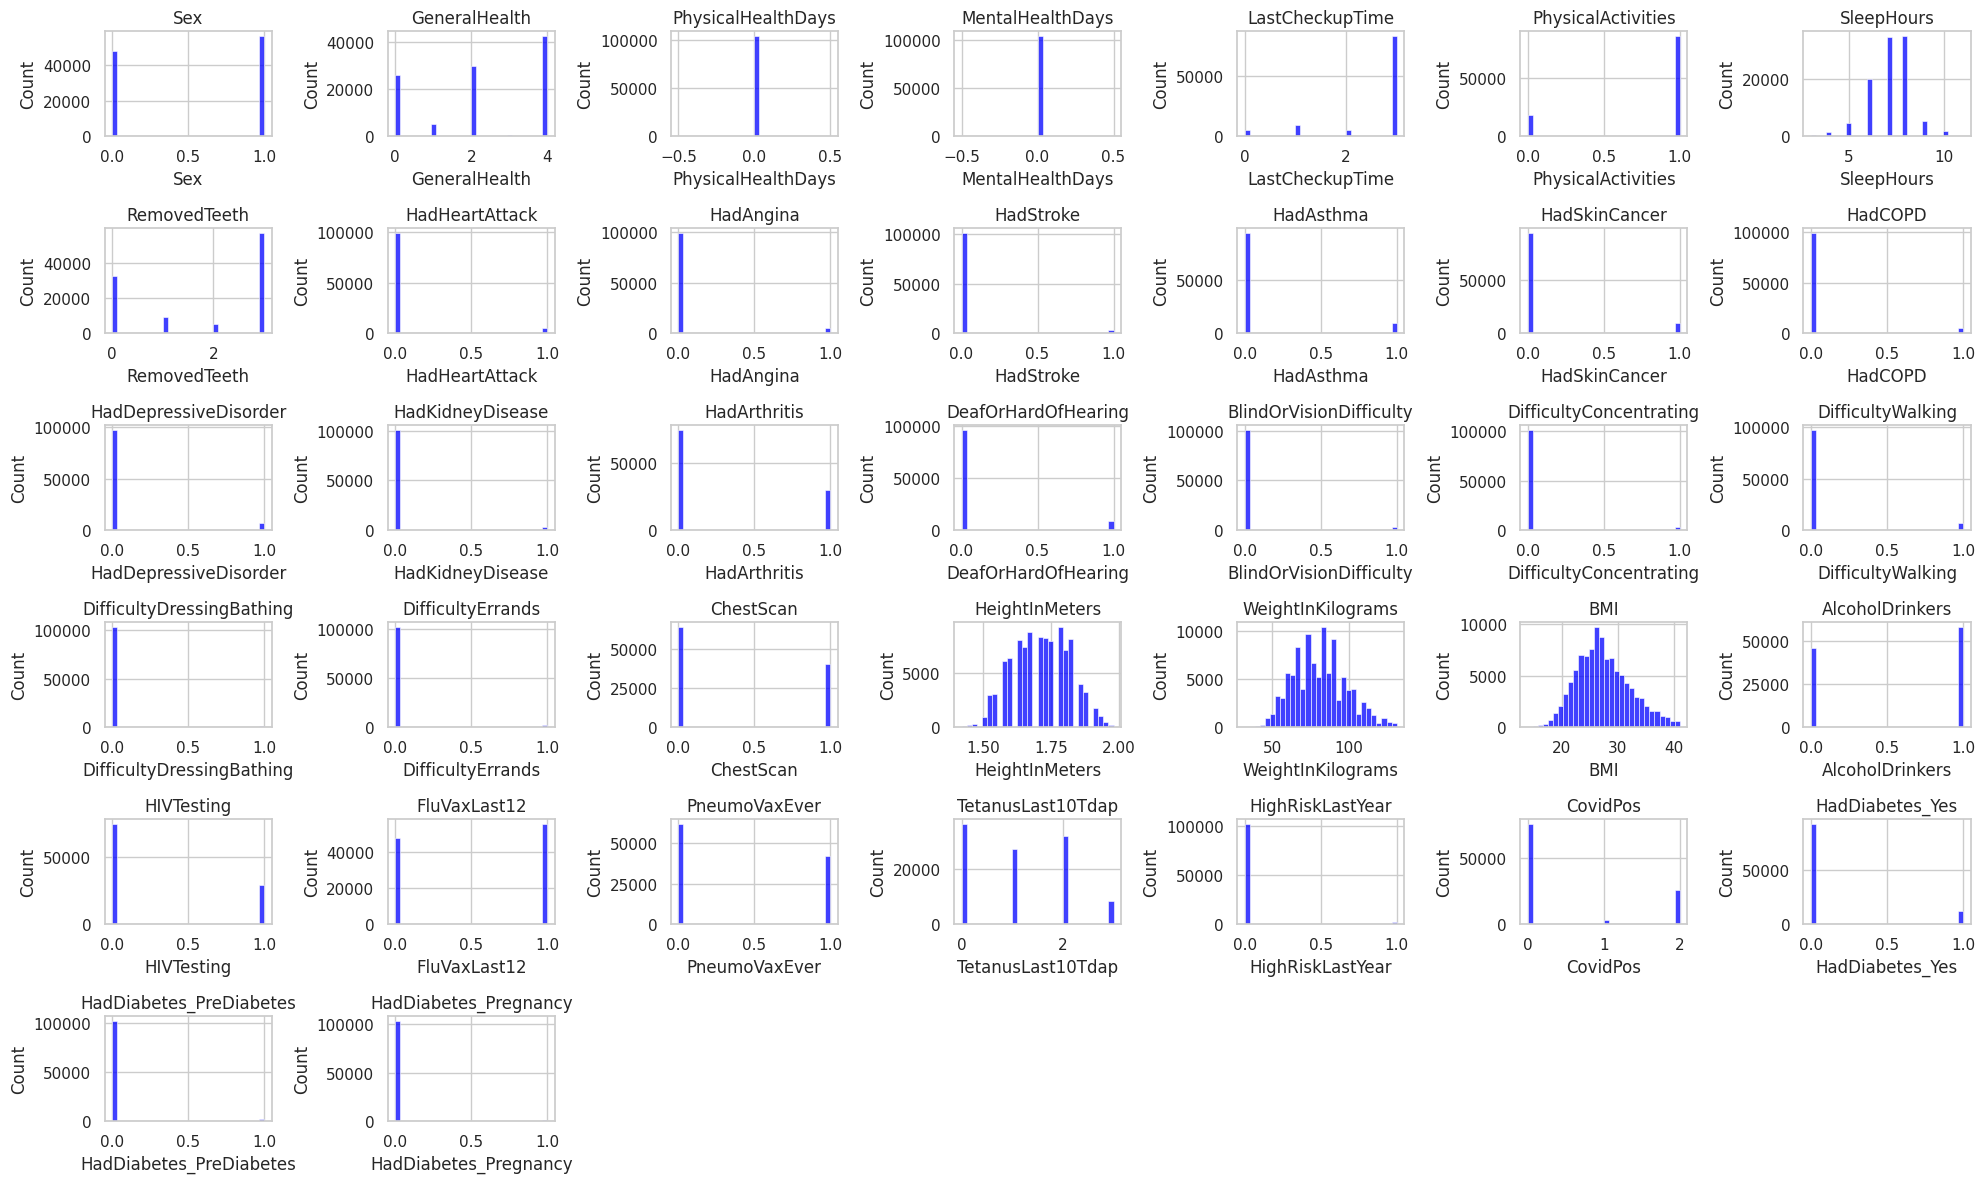

In [ ]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a figure with subplots
num_columns = brfss_data_cleaned.select_dtypes(include='number').columns  # Select only numerical columns
num_plots = len(num_columns)

plt.figure(figsize=(20, 12))  # Adjust size as needed

# Loop through the numerical columns and create histograms
for i, column in enumerate(num_columns):
    plt.subplot(6, 7, i + 1)  # Adjust the number of rows and columns based on your data
    sns.histplot(brfss_data_cleaned[column], bins=30, kde=False, color='blue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


<ipython-input-43-2e9a8b6be1f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadHeartAttack', data=brfss_data_cleaned, palette='pastel')


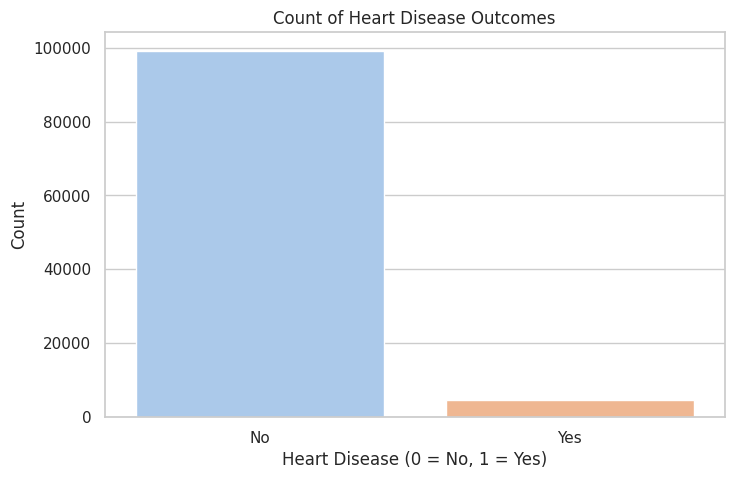

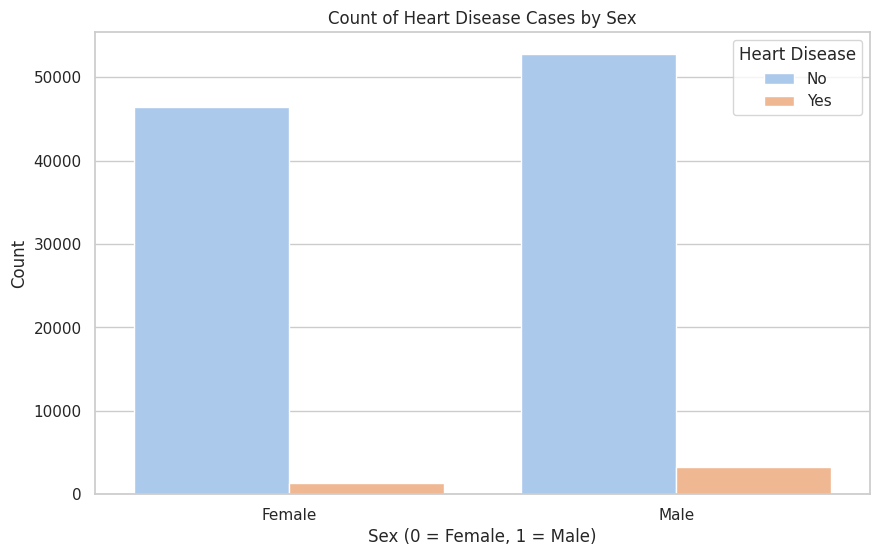

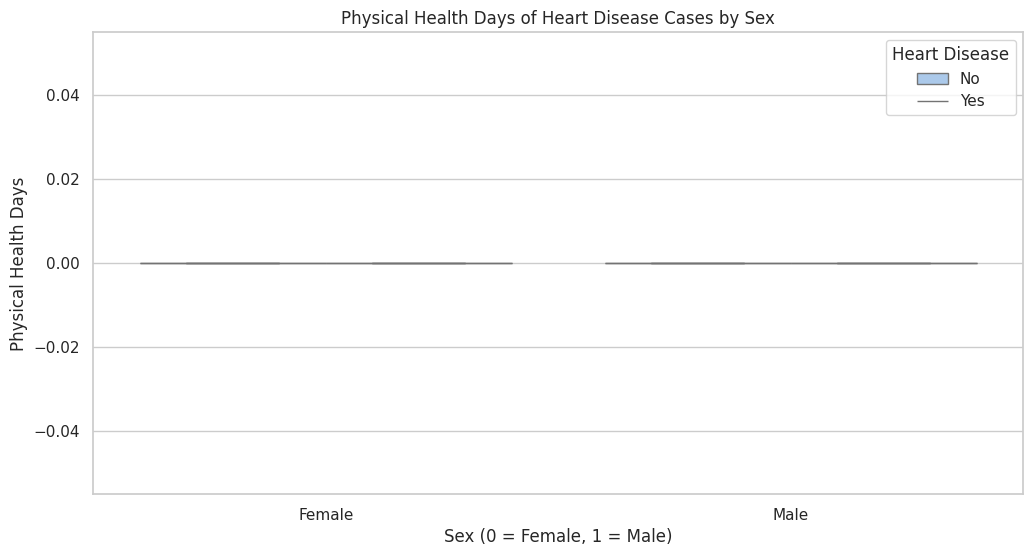

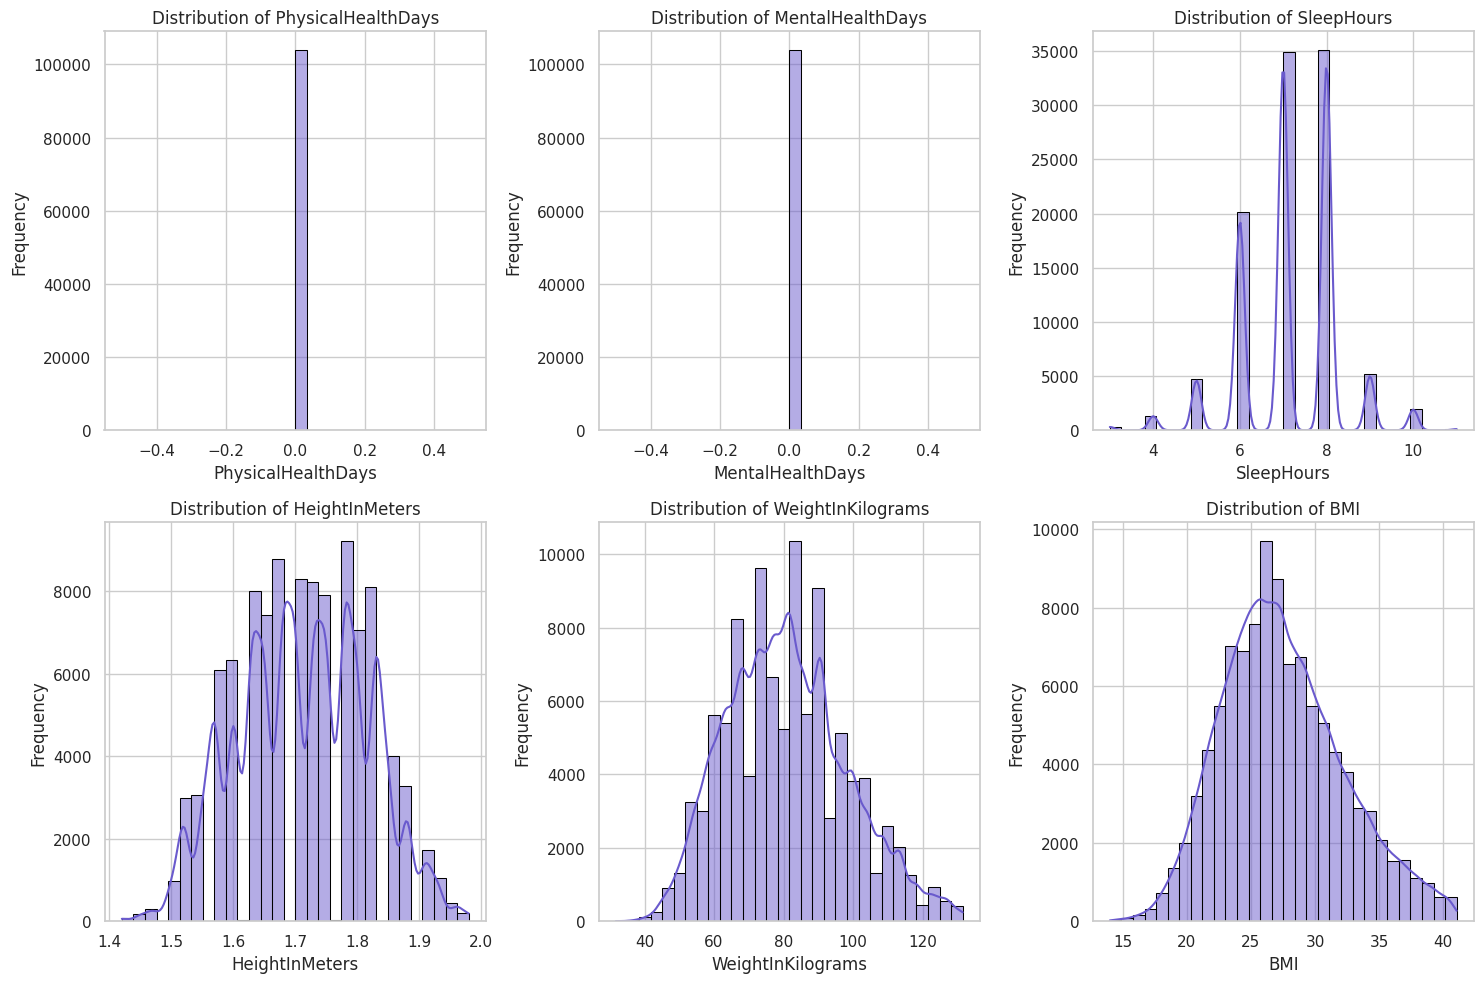

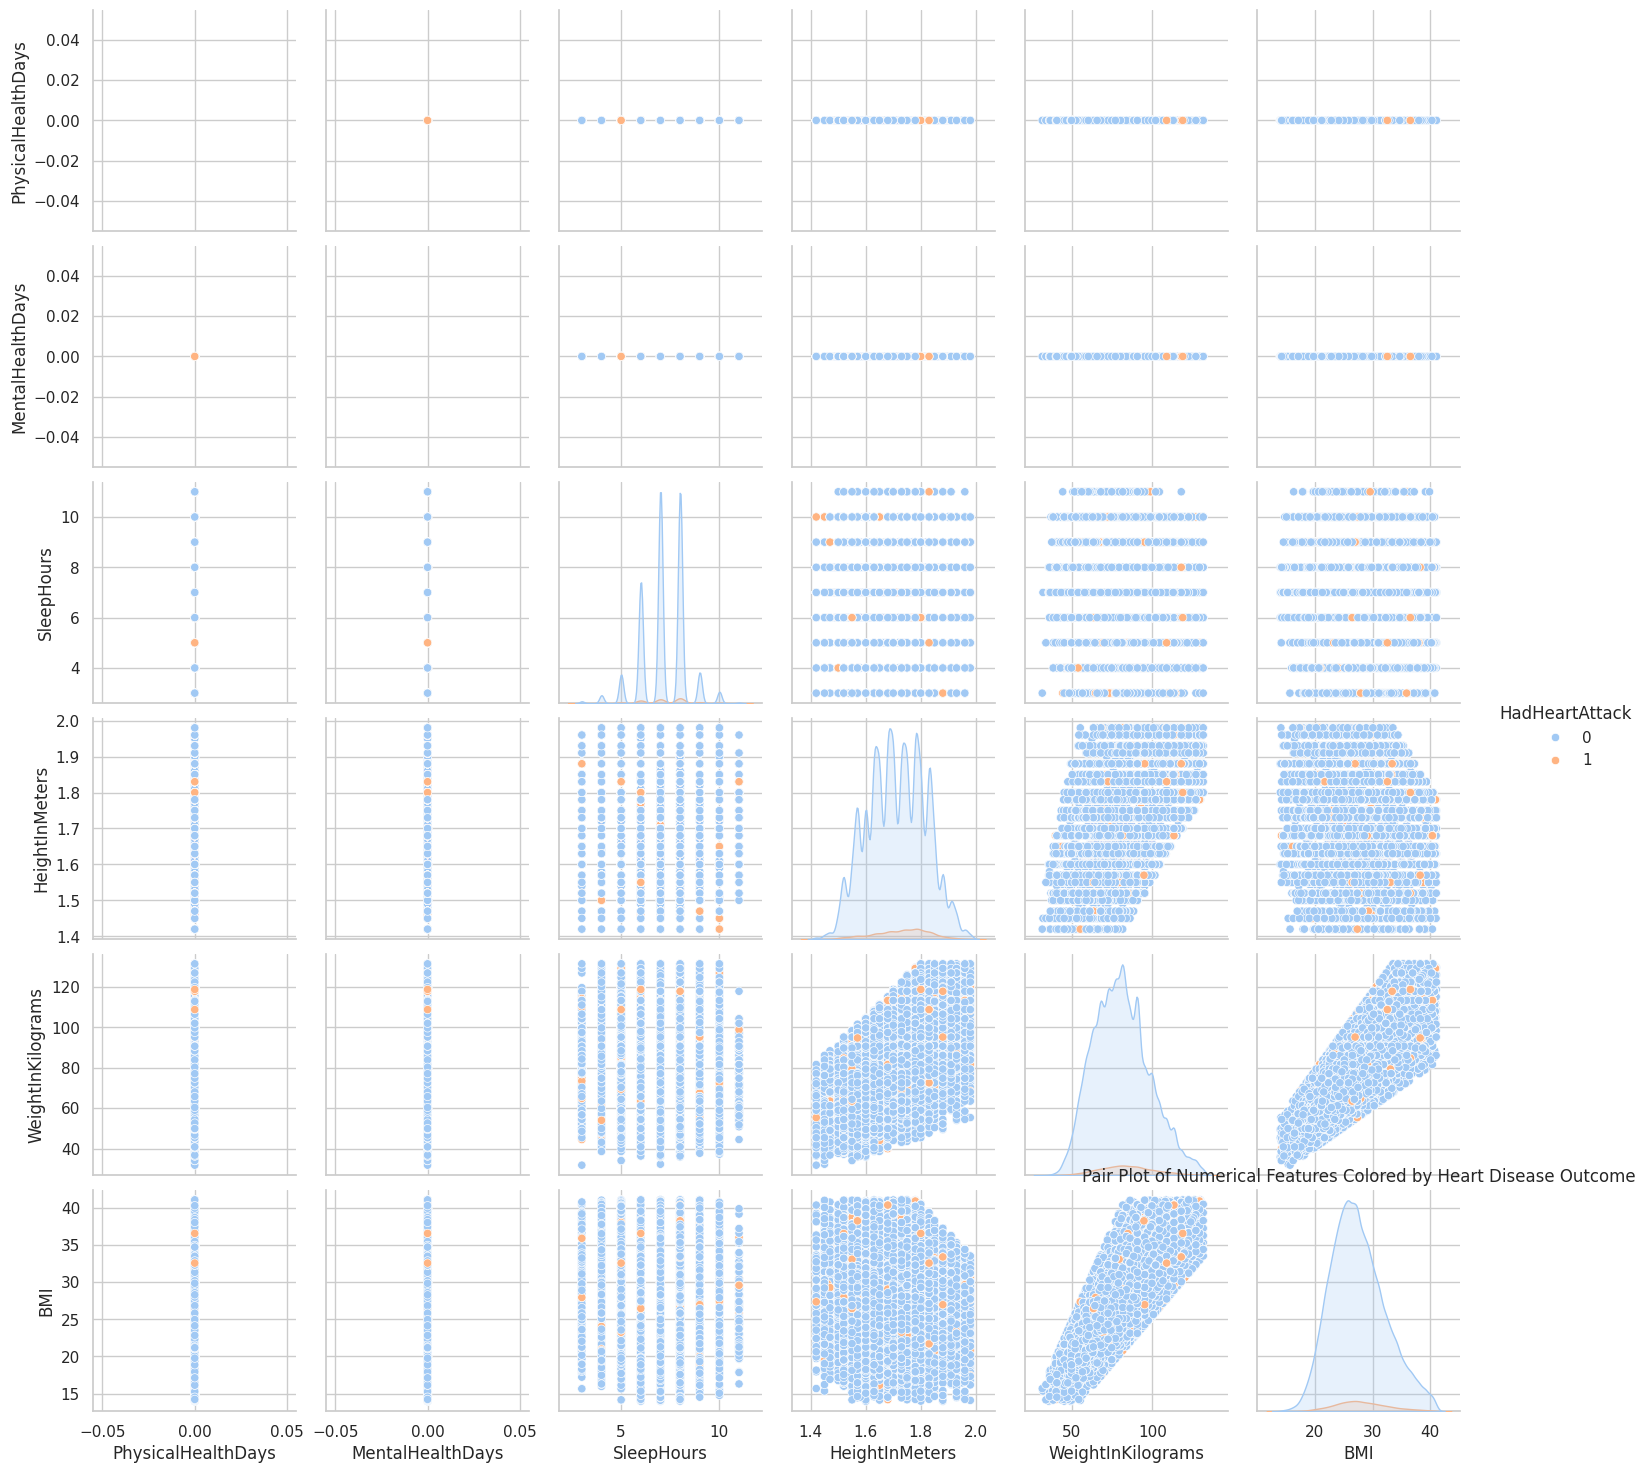

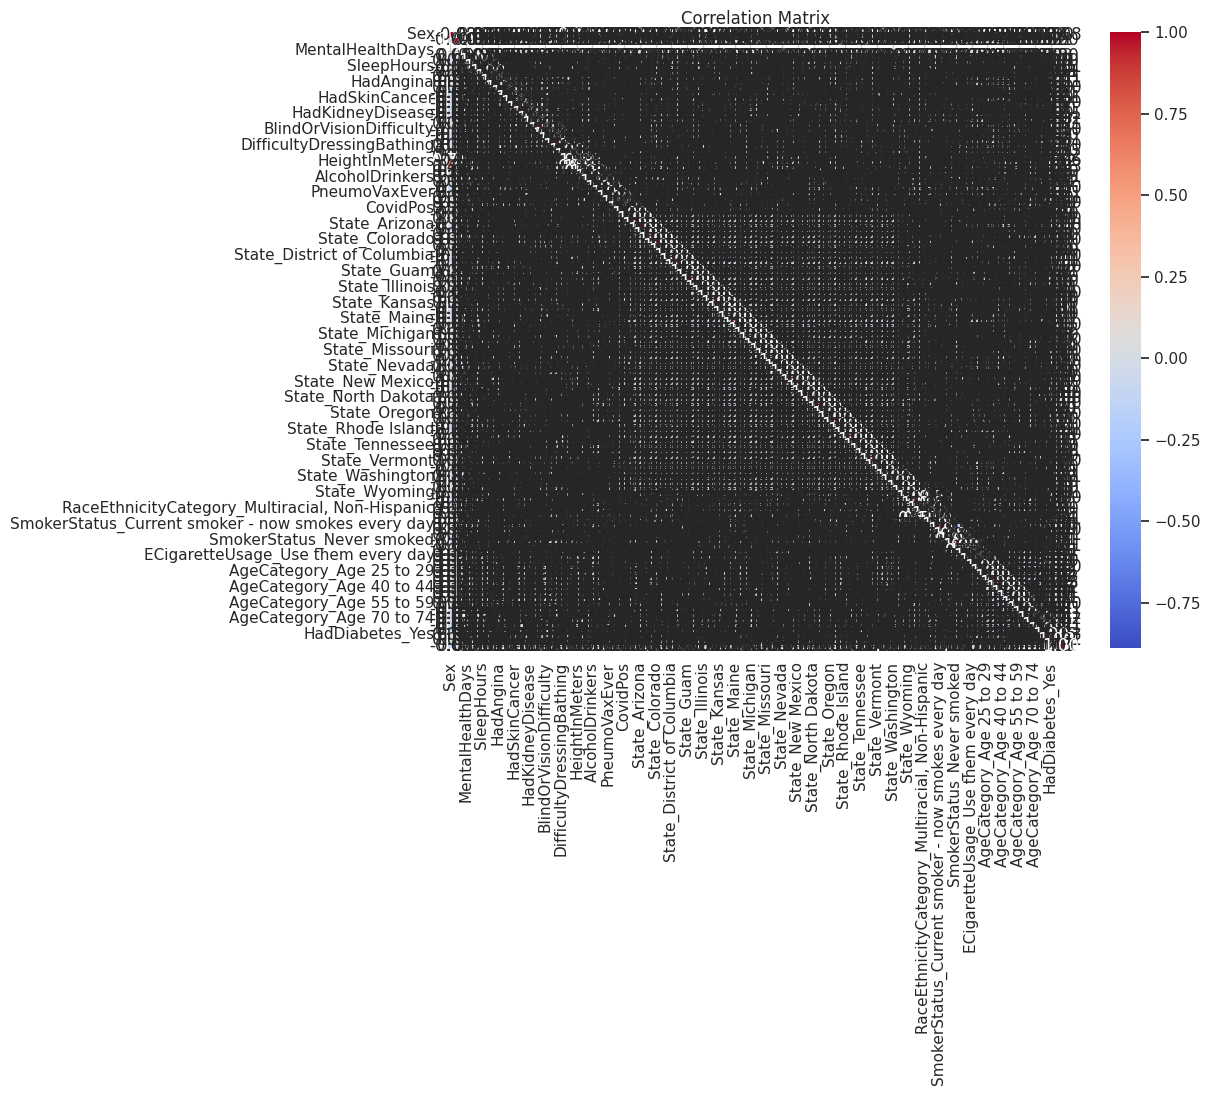

In [ ]:
# 1. Count Plot for Heart Disease Outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='HadHeartAttack', data=brfss_data_cleaned, palette='pastel')
plt.title('Count of Heart Disease Outcomes')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 2. Count Plot for Heart Disease by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HadHeartAttack', data=brfss_data_cleaned, palette='pastel')
plt.title('Count of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# 3. Box Plot for Physical Health Days by Heart Disease Outcome and Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='PhysicalHealthDays', hue='HadHeartAttack', data=brfss_data_cleaned, palette='pastel')
plt.title('Physical Health Days of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Physical Health Days')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# 4. Histograms for Selected Numeric Columns
num_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(brfss_data_cleaned[col], bins=30, kde=True, color='slateblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Pair Plot for Selected Features
sns.pairplot(brfss_data_cleaned, hue='HadHeartAttack', vars=num_cols, palette='pastel')
plt.title("Pair Plot of Numerical Features Colored by Heart Disease Outcome")
plt.show()

# 6. Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = brfss_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


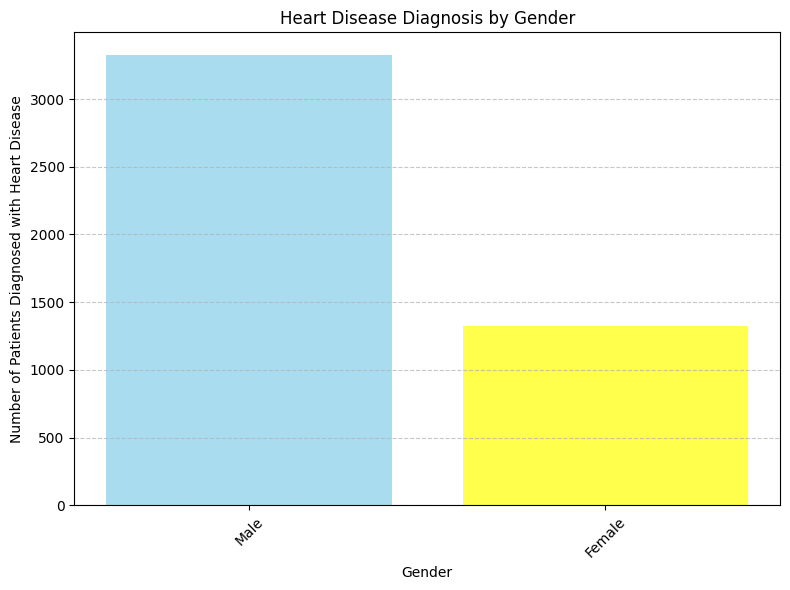

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the graph
data = {
    'Gender': ['Male', 'Female'],
    'Count': [3326, 1322]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['Gender'], df['Count'], color=['skyblue', 'yellow'], alpha=0.7)
plt.title('Heart Disease Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients Diagnosed with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


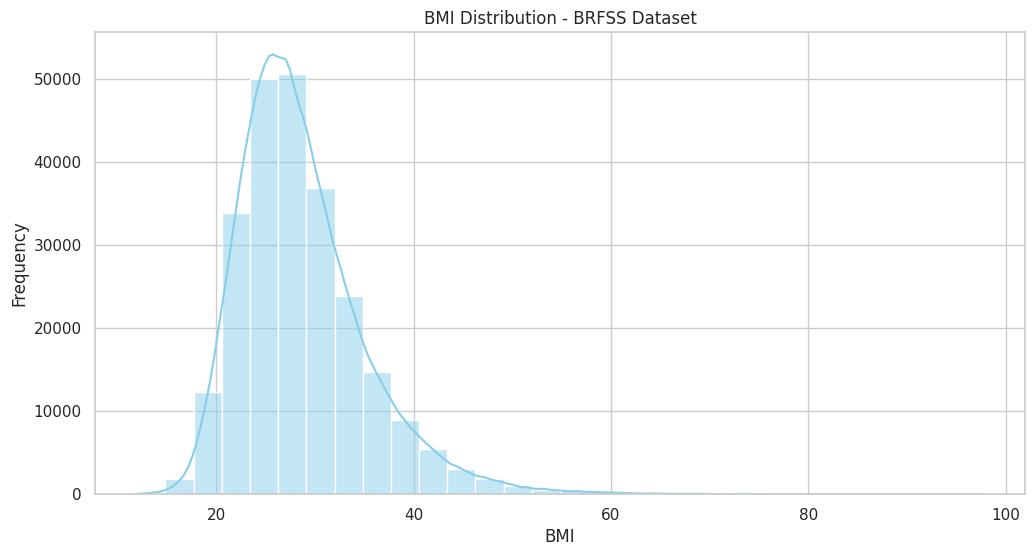

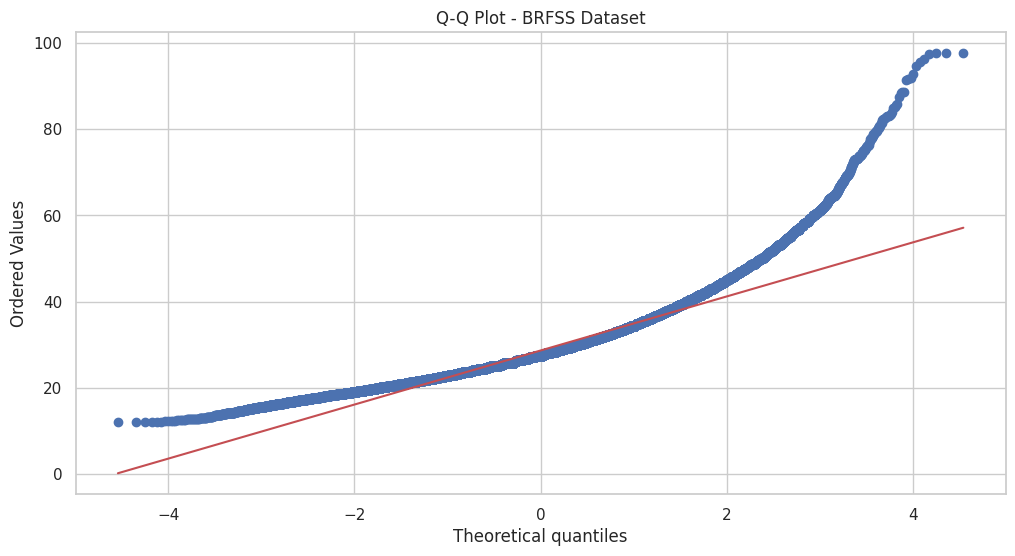

Shapiro-Wilk Test - BRFSS: ShapiroResult(statistic=0.9281966364565498, pvalue=2.3605722318935653e-121)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 246022.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



# For example, using BMI as a variable to check normality
bmi_data_brfss = brfss_data['BMI']


# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(bmi_data_brfss, bins=30, kde=True, color='skyblue')
plt.title('BMI Distribution - BRFSS Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()



# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(bmi_data_brfss, dist="norm", plot=plt)
plt.title('Q-Q Plot - BRFSS Dataset')
plt.show()



# Shapiro-Wilk Test
shapiro_test_brfss = stats.shapiro(bmi_data_brfss)

print('Shapiro-Wilk Test - BRFSS:', shapiro_test_brfss)



In [ ]:
total_patients = brfss_data_cleaned.shape[0]
males_count = brfss_data_cleaned[brfss_data_cleaned['Sex'] == 1].shape[0]  # Assuming 1 represents Male
females_count = brfss_data_cleaned[brfss_data_cleaned['Sex'] == 0].shape[0]  # Assuming 0 represents Female
heart_disease_count = brfss_data_cleaned[brfss_data_cleaned['HadHeartAttack'] == 1].shape[0]  # Assuming 1 represents Yes
print(f"This dataset comprises {brfss_data_cleaned.shape[1]} attributes and records from {total_patients} patients, including {males_count} males and {females_count} females across various age categories. Of these patients, {heart_disease_count} were diagnosed with heart disease.")


This dataset comprises 117 attributes and records from 103835 patients, including 56086 males and 47749 females across various age categories. Of these patients, 4648 were diagnosed with heart disease.


In [ ]:
# Count of heart disease patients
heart_disease_patients = brfss_data_cleaned[brfss_data_cleaned['HadHeartAttack'] == 1]

# Count of males and females diagnosed with heart disease
males_with_heart_disease = heart_disease_patients[heart_disease_patients['Sex'] == 1].shape[0]  # Assuming 1 represents Male
females_with_heart_disease = heart_disease_patients[heart_disease_patients['Sex'] == 0].shape[0]  # Assuming 0 represents Female

print(f"Number of males diagnosed with heart disease: {males_with_heart_disease}")
print(f"Number of females diagnosed with heart disease: {females_with_heart_disease}")


Number of males diagnosed with heart disease: 3326
Number of females diagnosed with heart disease: 1322


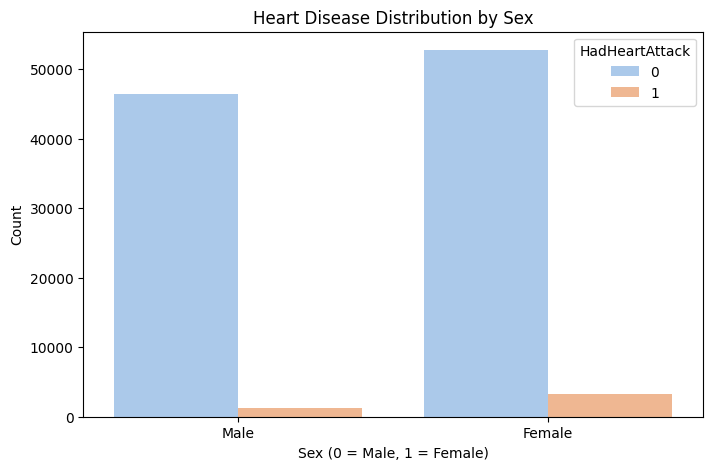

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a count plot for heart disease distribution by sex
plt.figure(figsize=(8, 5))
sns.countplot(data=brfss_data_cleaned, x='Sex', hue='HadHeartAttack', palette='pastel')
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])  # Optionally label the x-ticks
plt.show()




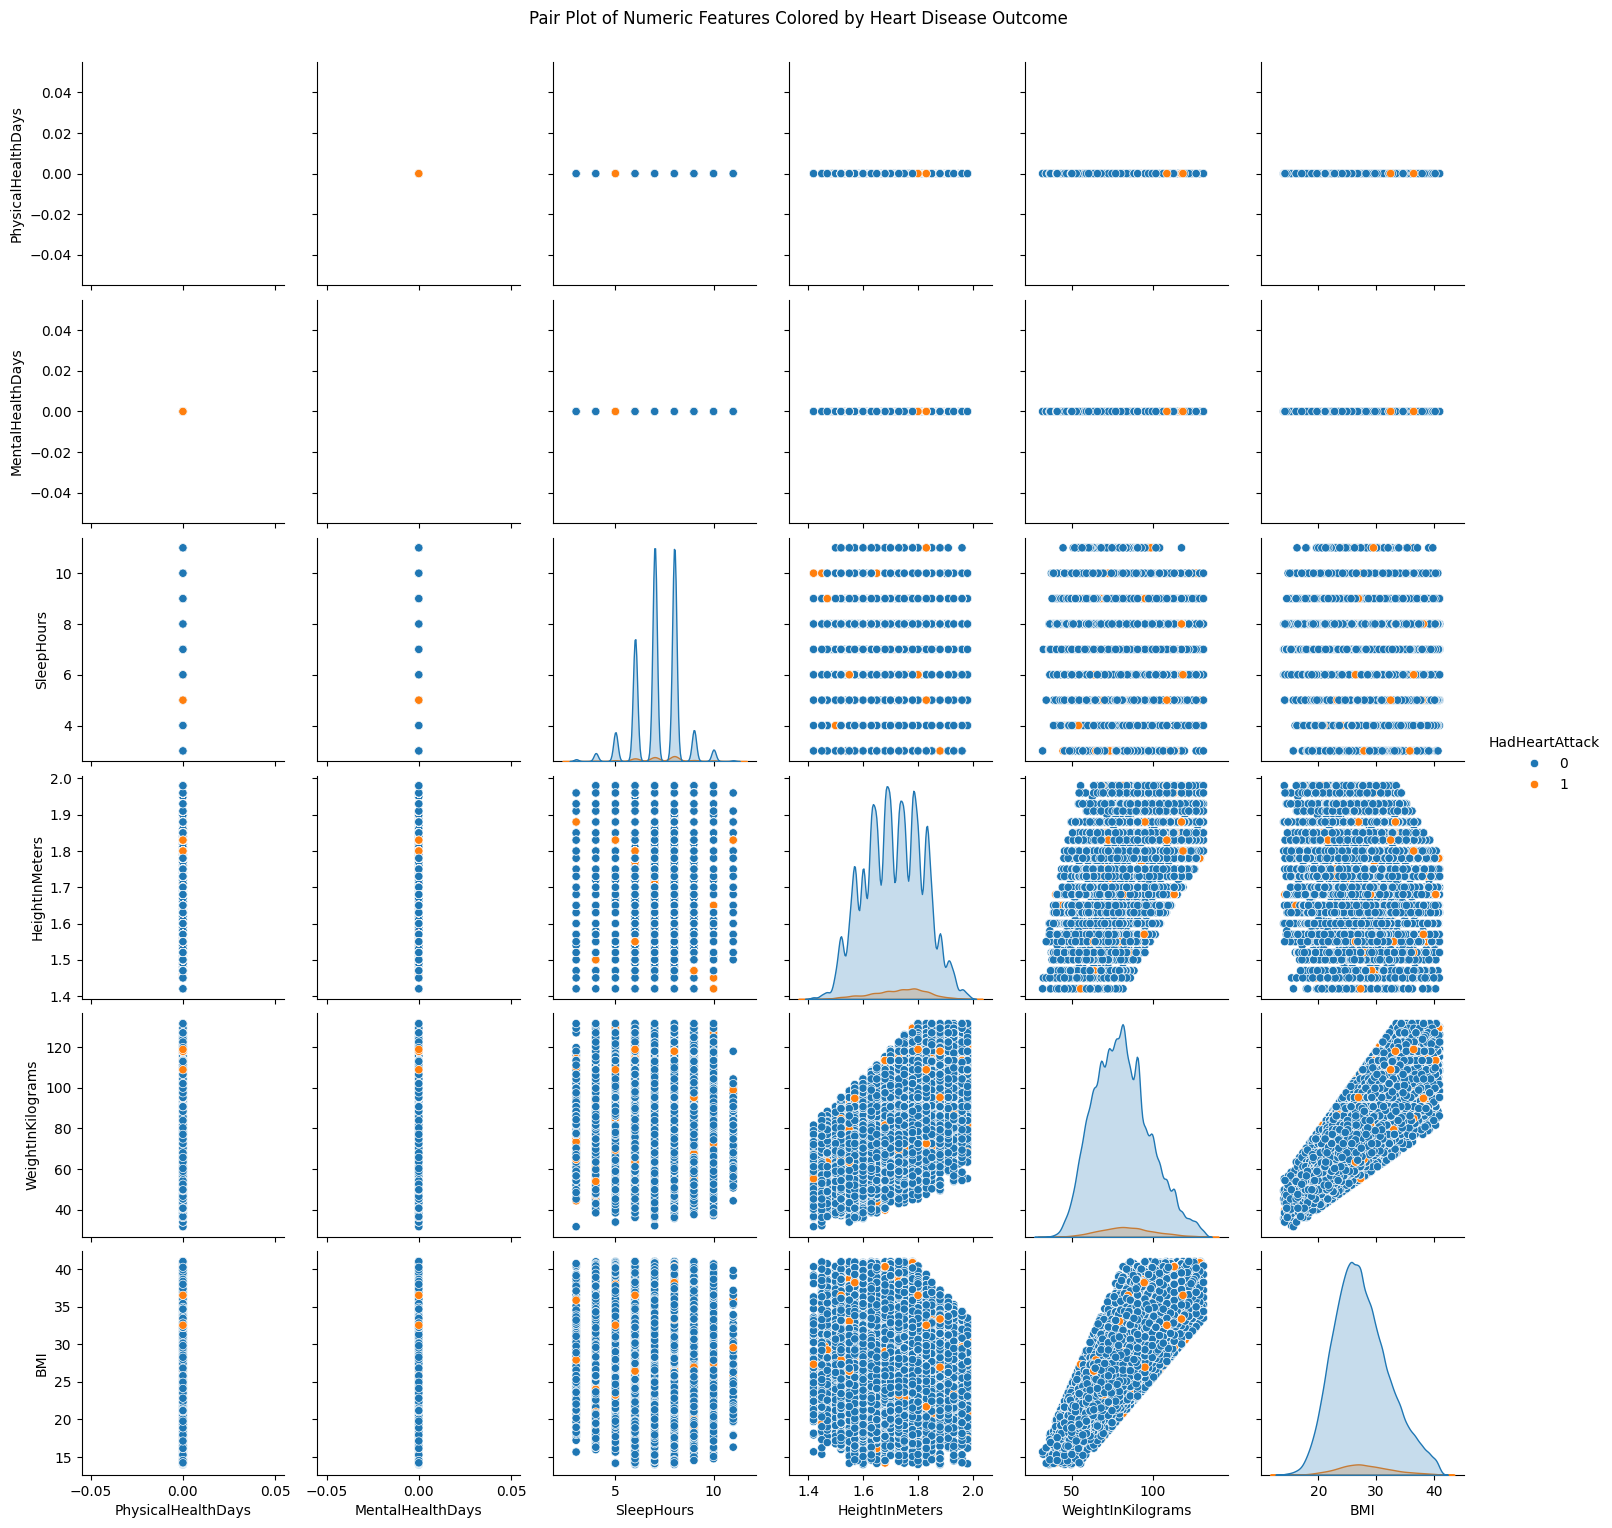

In [ ]:
sns.pairplot(brfss_data_cleaned, hue='HadHeartAttack', vars=['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'])
plt.suptitle('Pair Plot of Numeric Features Colored by Heart Disease Outcome', y=1.02)
plt.show()


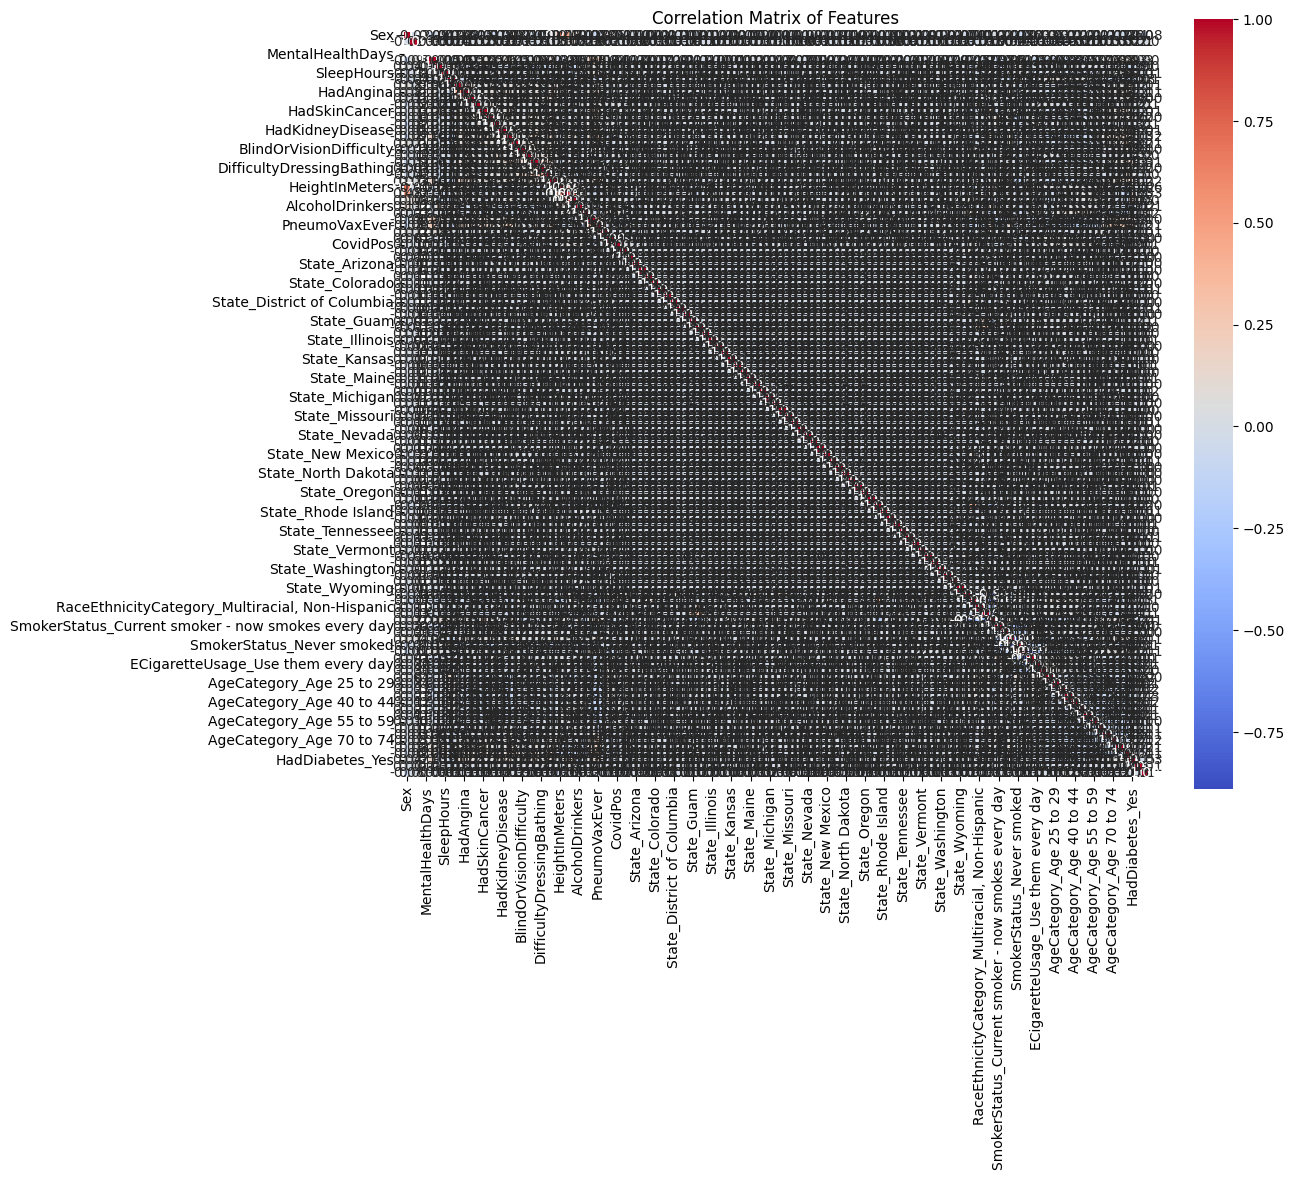

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = brfss_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()


# ***AutoEncoder and HeatMap***

<ipython-input-45-e8266fcbddb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brfss_data_cleaned, x='HadHeartAttack', y='BMI', palette='pastel')


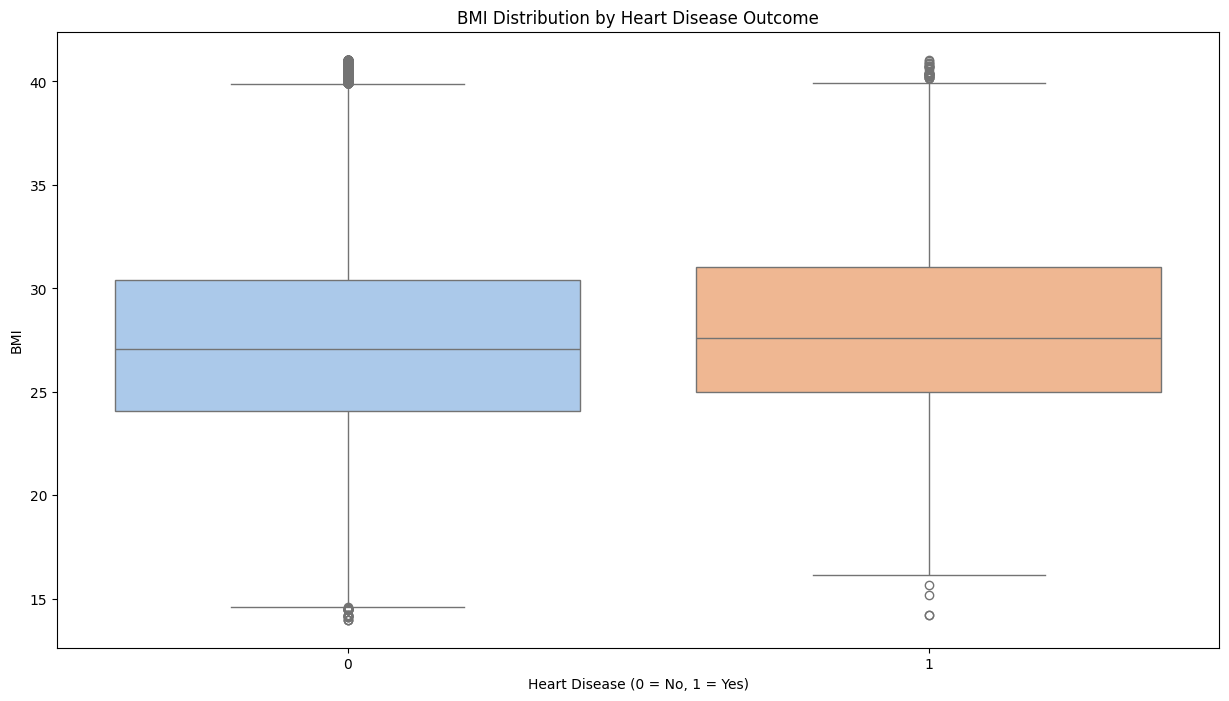

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=brfss_data_cleaned, x='HadHeartAttack', y='BMI', palette='pastel')
plt.title('BMI Distribution by Heart Disease Outcome')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


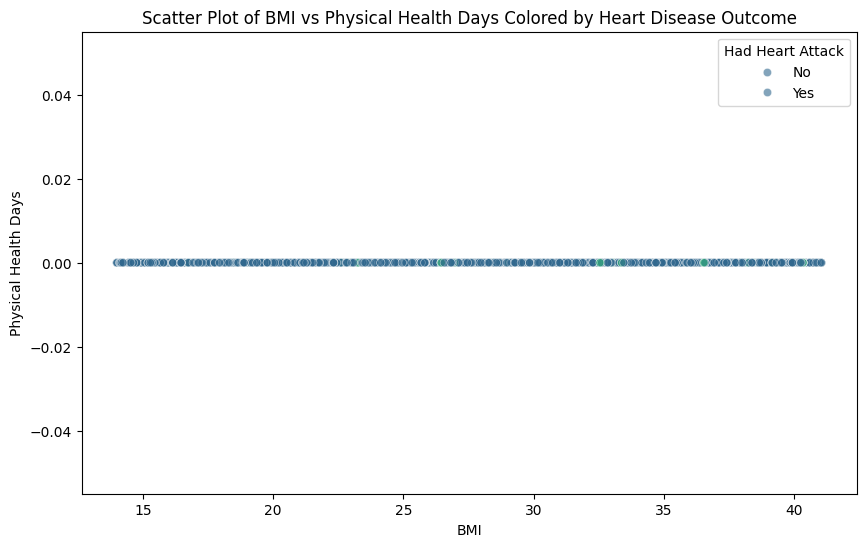

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brfss_data_cleaned, x='BMI', y='PhysicalHealthDays', hue='HadHeartAttack', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of BMI vs Physical Health Days Colored by Heart Disease Outcome')
plt.xlabel('BMI')
plt.ylabel('Physical Health Days')
plt.legend(title='Had Heart Attack', loc='upper right', labels=['No', 'Yes'])
plt.show()


<ipython-input-47-fd0293e92bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brfss_data_cleaned, x='HadHeartAttack', y='BMI', palette='pastel')


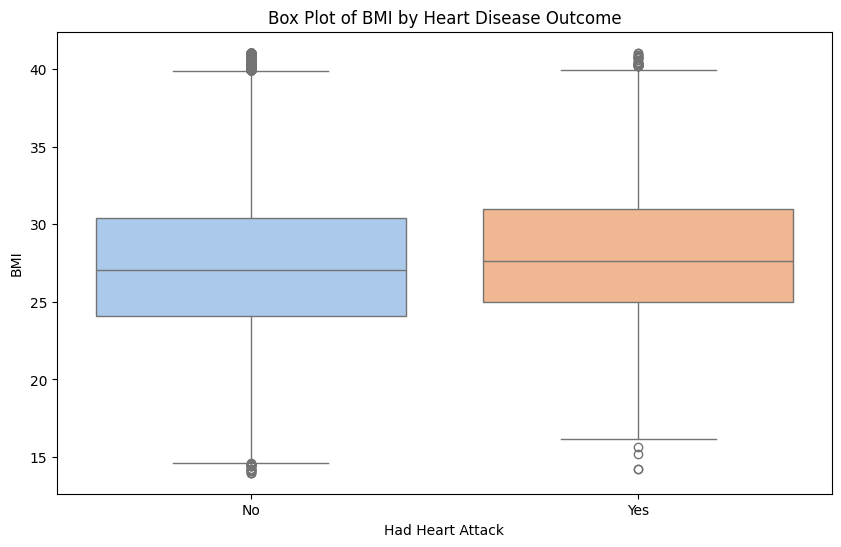

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=brfss_data_cleaned, x='HadHeartAttack', y='BMI', palette='pastel')
plt.title('Box Plot of BMI by Heart Disease Outcome')
plt.xlabel('Had Heart Attack')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No', 'Yes'])  # Optionally label the x-ticks
plt.show()


# ***Data Normalization***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to normalize
columns_to_normalize = brfss_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler and transform the data
brfss_data_cleaned[columns_to_normalize] = scaler.fit_transform(brfss_data_cleaned[columns_to_normalize])


In [ ]:
# Save cleaned data to a CSV file
brfss_data_cleaned.to_csv('cleaned_data.csv', index=False)


# ***Class Imbalance***

<Axes: xlabel='HadHeartAttack'>

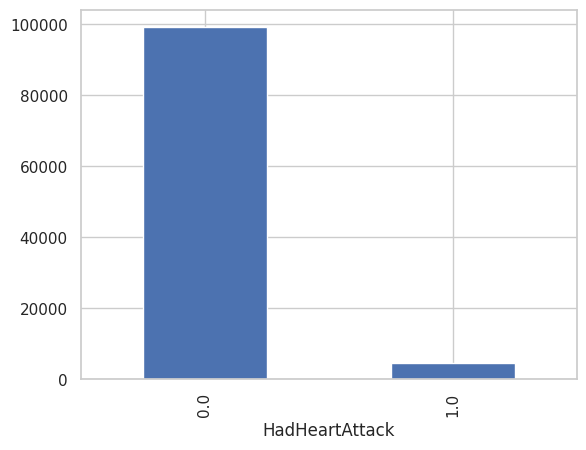

In [ ]:
brfss_data_cleaned['HadHeartAttack'].value_counts().plot(kind='bar')


In [ ]:
brfss_data_cleaned['HadHeartAttack'].value_counts()


HadHeartAttack
0.0    99187
1.0     4648
Name: count, dtype: int64

# ***SMOT***

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming `X` contains your features and `y` contains your target ('HadHeartAttack')

# Split data into features (X) and target (y)
X = brfss_data_frame.drop(columns=['HadHeartAttack'])  # Replace with your feature columns
y = brfss_data_frame['HadHeartAttack']  # Target variable

# Split into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# You now have balanced training data (X_train_res and y_train_res)


NameError: name 'brfss_data_frame' is not defined

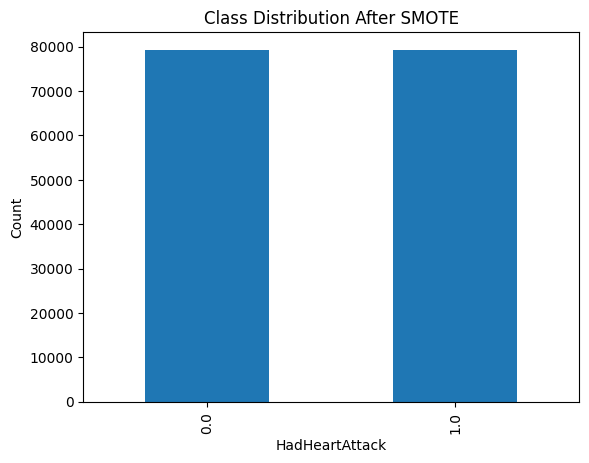

In [ ]:
import matplotlib.pyplot as plt
y_train_res.value_counts().plot(kind='bar')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()

In [ ]:
brfss_data_frame = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Load the cleaned data from the saved CSV file
brfss_data_frame = pd.read_csv('/content/cleaned_data.csv')

# Split the dataset into features (X) and target (y)
X = brfss_data_frame.drop('HadHeartAttack', axis=1)  # Assuming 'HadHeartAttack' is your target column
y = brfss_data_frame['HadHeartAttack']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary of models to test
models = {
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'RBF Network': MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='adam', random_state=42)
}

# Iterate over each model and evaluate
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Accuracy, Classification Report, and AUC
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    print(f"Accuracy for {model_name}: {acc}")
    print(f"AUC for {model_name}: {auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


Evaluating SVM...
Accuracy for SVM: 0.9555712497191101
AUC for SVM: 0.5305138211205294
Confusion Matrix:
[[29767     0]
 [ 1384     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29767
         1.0       0.00      0.00      0.00      1384

    accuracy                           0.96     31151
   macro avg       0.48      0.50      0.49     31151
weighted avg       0.91      0.96      0.93     31151



Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for Decision Tree: 0.9282848062662515
AUC for Decision Tree: 0.602154842882806
Confusion Matrix:
[[28579  1188]
 [ 1046   338]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     29767
         1.0       0.22      0.24      0.23      1384

    accuracy                           0.93     31151
   macro avg       0.59      0.60      0.60     31151
weighted avg       0.93      0.93      0.93     31151



Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.9546724021700748
AUC for Logistic Regression: 0.8717556548538544
Confusion Matrix:
[[29480   287]
 [ 1125   259]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.47      0.19      0.27      1384

    accuracy                           0.95     31151
   macro avg       0.72      0.59      0.62     31151
weighted avg       0.94      0.9

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:32:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost: 0.9545760970755353
AUC for XGBoost: 0.8649506955854245
Confusion Matrix:
[[29475   292]
 [ 1123   261]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.47      0.19      0.27      1384

    accuracy                           0.95     31151
   macro avg       0.72      0.59      0.62     31151
weighted avg       0.94      0.95      0.95     31151



Evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.9557638599081891
AUC for Gradient Boosting: 0.8795824836868853
Confusion Matrix:
[[29508   259]
 [ 1119   265]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.51      0.19      0.28      1384

    accuracy                           0.96     31151
   macro avg       0.73      0.59      0.63     31151
weighted avg       0.94      0.96      0.95     3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for RBF Network: 0.9461012487560592
AUC for RBF Network: 0.7942285274980577
Confusion Matrix:
[[29193   574]
 [ 1105   279]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     29767
         1.0       0.33      0.20      0.25      1384

    accuracy                           0.95     31151
   macro avg       0.65      0.59      0.61     31151
weighted avg       0.94      0.95      0.94     31151





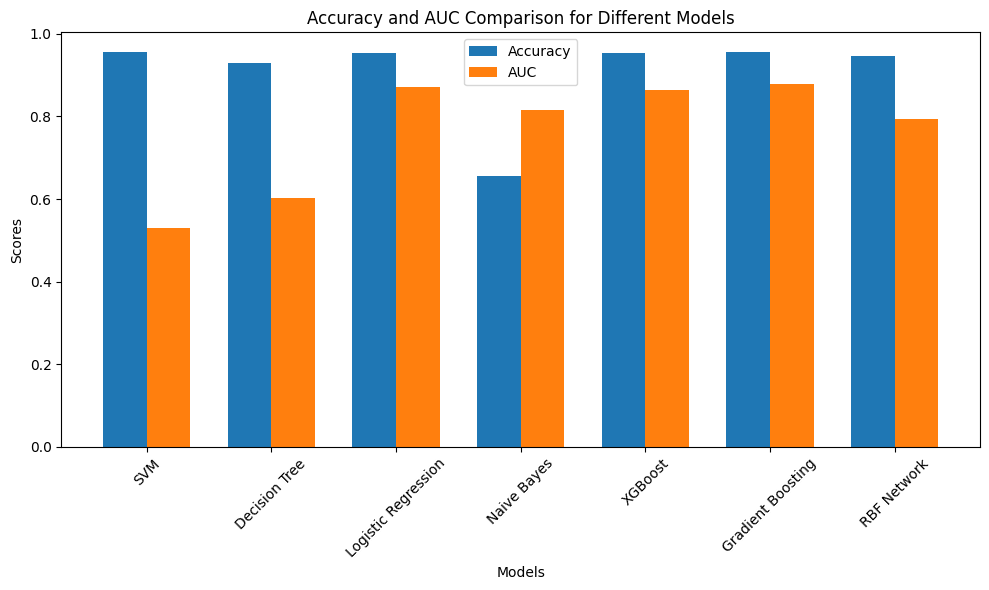

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names, accuracies, and AUC values from the previous evaluation
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'Gradient Boosting', 'RBF Network']
accuracies = [0.9556, 0.9283, 0.9547, 0.6545, 0.9546, 0.9558, 0.9461]  # Accuracy values you got from the evaluation
aucs = [0.5305, 0.6022, 0.8718, 0.8148, 0.8650, 0.8796, 0.7942]  # AUC values from the evaluation

# Bar Plot for Accuracy and AUC Comparison
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_names))
bar_width = 0.35

bars1 = plt.bar(index, accuracies, bar_width, label='Accuracy')
bars2 = plt.bar(index + bar_width, aucs, bar_width, label='AUC')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy and AUC Comparison for Different Models')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Evaluating SVM...


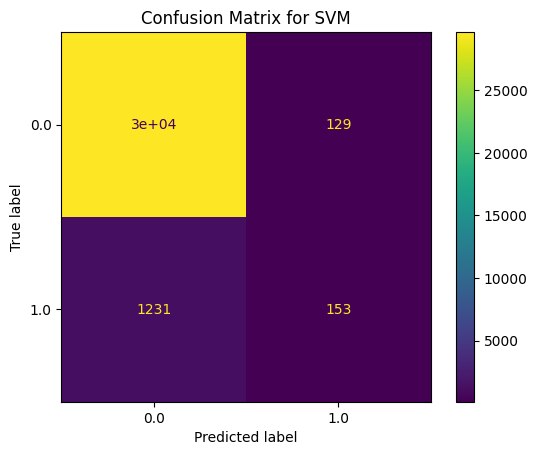

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29767
         1.0       0.54      0.11      0.18      1384

    accuracy                           0.96     31151
   macro avg       0.75      0.55      0.58     31151
weighted avg       0.94      0.96      0.94     31151

Evaluating Decision Tree...


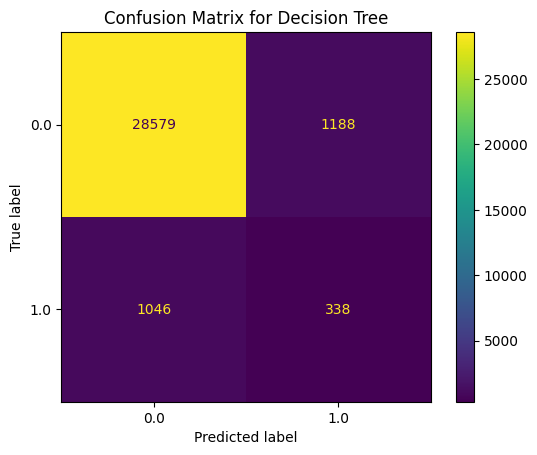

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     29767
         1.0       0.22      0.24      0.23      1384

    accuracy                           0.93     31151
   macro avg       0.59      0.60      0.60     31151
weighted avg       0.93      0.93      0.93     31151

Evaluating Logistic Regression...


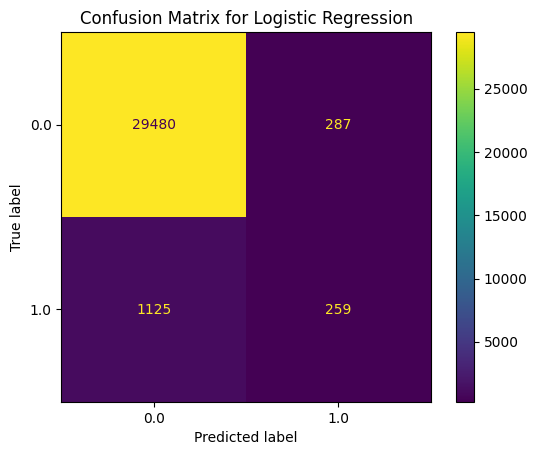

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.47      0.19      0.27      1384

    accuracy                           0.95     31151
   macro avg       0.72      0.59      0.62     31151
weighted avg       0.94      0.95      0.95     31151

Evaluating Naive Bayes...


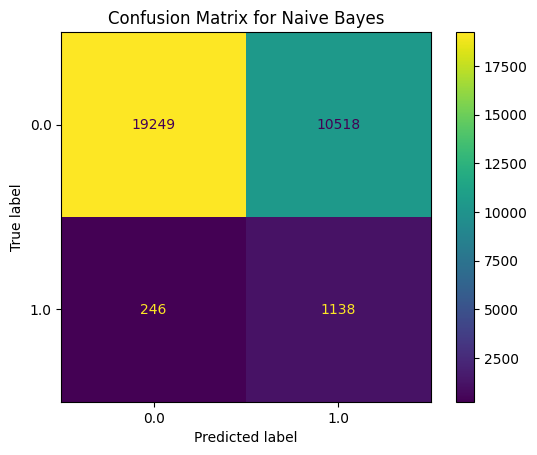

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78     29767
         1.0       0.10      0.82      0.17      1384

    accuracy                           0.65     31151
   macro avg       0.54      0.73      0.48     31151
weighted avg       0.95      0.65      0.75     31151

Evaluating XGBoost...


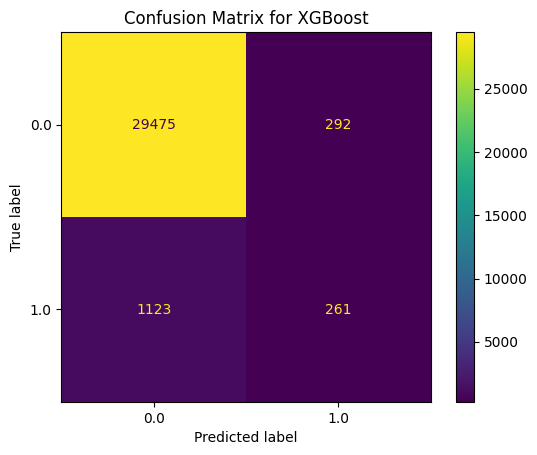

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.47      0.19      0.27      1384

    accuracy                           0.95     31151
   macro avg       0.72      0.59      0.62     31151
weighted avg       0.94      0.95      0.95     31151

Evaluating Gradient Boosting...


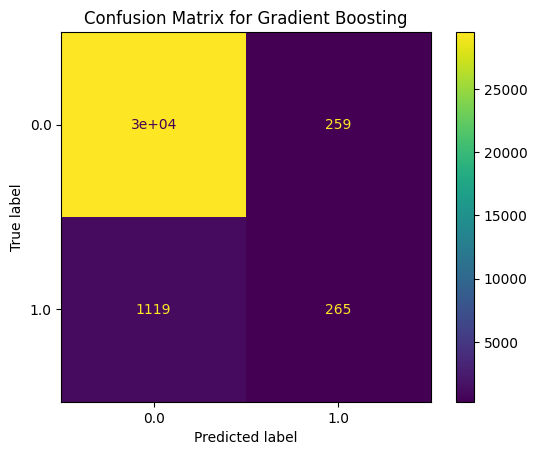

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29767
         1.0       0.51      0.19      0.28      1384

    accuracy                           0.96     31151
   macro avg       0.73      0.59      0.63     31151
weighted avg       0.94      0.96      0.95     31151

Evaluating RBF Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


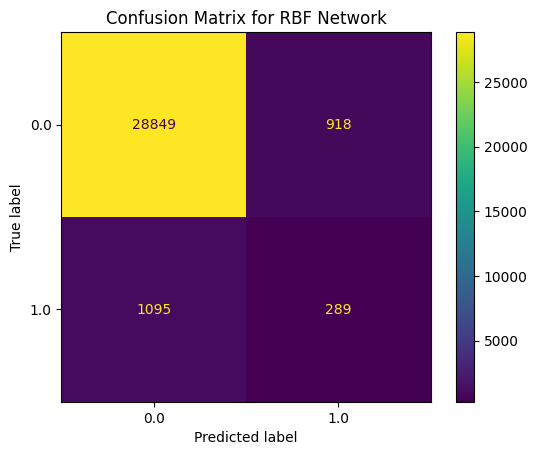

Classification Report for RBF Network:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     29767
         1.0       0.24      0.21      0.22      1384

    accuracy                           0.94     31151
   macro avg       0.60      0.59      0.59     31151
weighted avg       0.93      0.94      0.93     31151



In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

# Define models
models = {
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'RBF Network': MLPClassifier(random_state=42, activation='relu', max_iter=200)
}

# Assuming your data is in 'brfss_data_frame' and the target is 'HadHeartAttack'
X = brfss_data_frame.drop('HadHeartAttack', axis=1)
y = brfss_data_frame['HadHeartAttack']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate through models and evaluate each one
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("="*60)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Convert Encoded Features to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=[f'Feature_{i+1}' for i in range(X_encoded.shape[1])])

# Step 2: Calculate Correlation Matrix
correlation_matrix = encoded_df.corr()

# Step 3: Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Autoencoder-Selected Features')
plt.show()
